# Learning Algorithm

## Multi-Agent Actor Critic ([Lowe et al., 2017](https://arxiv.org/pdf/1706.02275.pdf))

### **From [lilianweng's blog](https://lilianweng.github.io/lil-log/2018/04/08/policy-gradient-algorithms.html#maddpg)** :

<p><strong>Multi-agent DDPG</strong> (<strong>MADDPG</strong>) (<a href="https://arxiv.org/pdf/1706.02275.pdf">Lowe et al., 2017</a>) extends DDPG to an environment where multiple agents are coordinating to complete tasks with only local information. In the viewpoint of one agent, the environment is non-stationary as policies of other agents are quickly upgraded and remain unknown. MADDPG is an actor-critic model redesigned particularly for handling such a changing environment and interactions between agents.</p>


<p>The problem can be formalized in the multi-agent version of MDP, also known as <em>Markov games</em>. MADDPG is proposed for partially observable Markov games. Say, there are N agents in total with a set of states <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-216-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi class=&quot;MJX-tex-caligraphic&quot; mathvariant=&quot;script&quot;>S</mi></mrow></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-4983" style="width: 0.809em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.658em; height: 0px; font-size: 124%;"><span style="position: absolute; clip: rect(1.515em, 1000.66em, 2.523em, -999.997em); top: -2.366em; left: 0em;"><span class="mrow" id="MathJax-Span-4984"><span class="texatom" id="MathJax-Span-4985"><span class="mrow" id="MathJax-Span-4986"><span class="mi" id="MathJax-Span-4987" style="font-family: MathJax_Caligraphic;">S<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.053em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.371em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.059em; border-left: 0px solid; width: 0px; height: 1.003em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mrow class="MJX-TeXAtom-ORD"><mi class="MJX-tex-caligraphic" mathvariant="script">S</mi></mrow></math></span></span><script type="math/tex" id="MathJax-Element-216">\mathcal{S}</script>. Each agent owns a set of possible action, <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-217-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msub><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi class=&quot;MJX-tex-caligraphic&quot; mathvariant=&quot;script&quot;>A</mi></mrow><mn>1</mn></msub><mo>,</mo><mo>&amp;#x2026;</mo><mo>,</mo><msub><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi class=&quot;MJX-tex-caligraphic&quot; mathvariant=&quot;script&quot;>A</mi></mrow><mi>N</mi></msub></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-4988" style="width: 6.152em; display: inline-block;"><span style="display: inline-block; position: relative; width: 4.942em; height: 0px; font-size: 124%;"><span style="position: absolute; clip: rect(1.515em, 1004.94em, 2.724em, -999.997em); top: -2.366em; left: 0em;"><span class="mrow" id="MathJax-Span-4989"><span class="msubsup" id="MathJax-Span-4990"><span style="display: inline-block; position: relative; width: 1.212em; height: 0px;"><span style="position: absolute; clip: rect(3.128em, 1000.81em, 4.186em, -999.997em); top: -3.979em; left: 0em;"><span class="texatom" id="MathJax-Span-4991"><span class="mrow" id="MathJax-Span-4992"><span class="mi" id="MathJax-Span-4993" style="font-family: MathJax_Caligraphic;">A<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.828em; left: 0.809em;"><span class="mn" id="MathJax-Span-4994" style="font-size: 70.7%; font-family: MathJax_Main;">1</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span><span class="mo" id="MathJax-Span-4995" style="font-family: MathJax_Main;">,</span><span class="mo" id="MathJax-Span-4996" style="font-family: MathJax_Main; padding-left: 0.154em;">…</span><span class="mo" id="MathJax-Span-4997" style="font-family: MathJax_Main; padding-left: 0.154em;">,</span><span class="msubsup" id="MathJax-Span-4998" style="padding-left: 0.154em;"><span style="display: inline-block; position: relative; width: 1.515em; height: 0px;"><span style="position: absolute; clip: rect(3.128em, 1000.81em, 4.186em, -999.997em); top: -3.979em; left: 0em;"><span class="texatom" id="MathJax-Span-4999"><span class="mrow" id="MathJax-Span-5000"><span class="mi" id="MathJax-Span-5001" style="font-family: MathJax_Caligraphic;">A<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.828em; left: 0.809em;"><span class="mi" id="MathJax-Span-5002" style="font-size: 70.7%; font-family: MathJax_Math-italic;">N<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.053em;"></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.371em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.309em; border-left: 0px solid; width: 0px; height: 1.253em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msub><mrow class="MJX-TeXAtom-ORD"><mi class="MJX-tex-caligraphic" mathvariant="script">A</mi></mrow><mn>1</mn></msub><mo>,</mo><mo>…</mo><mo>,</mo><msub><mrow class="MJX-TeXAtom-ORD"><mi class="MJX-tex-caligraphic" mathvariant="script">A</mi></mrow><mi>N</mi></msub></math></span></span><script type="math/tex" id="MathJax-Element-217">\mathcal{A}_1, \dots, \mathcal{A}_N</script>, and a set of observation, <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-218-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msub><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi class=&quot;MJX-tex-caligraphic&quot; mathvariant=&quot;script&quot;>O</mi></mrow><mn>1</mn></msub><mo>,</mo><mo>&amp;#x2026;</mo><mo>,</mo><msub><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi class=&quot;MJX-tex-caligraphic&quot; mathvariant=&quot;script&quot;>O</mi></mrow><mi>N</mi></msub></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-5003" style="width: 6.152em; display: inline-block;"><span style="display: inline-block; position: relative; width: 4.942em; height: 0px; font-size: 124%;"><span style="position: absolute; clip: rect(1.515em, 1004.94em, 2.724em, -999.997em); top: -2.366em; left: 0em;"><span class="mrow" id="MathJax-Span-5004"><span class="msubsup" id="MathJax-Span-5005"><span style="display: inline-block; position: relative; width: 1.212em; height: 0px;"><span style="position: absolute; clip: rect(3.128em, 1000.76em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="texatom" id="MathJax-Span-5006"><span class="mrow" id="MathJax-Span-5007"><span class="mi" id="MathJax-Span-5008" style="font-family: MathJax_Caligraphic;">O</span></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.828em; left: 0.809em;"><span class="mn" id="MathJax-Span-5009" style="font-size: 70.7%; font-family: MathJax_Main;">1</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span><span class="mo" id="MathJax-Span-5010" style="font-family: MathJax_Main;">,</span><span class="mo" id="MathJax-Span-5011" style="font-family: MathJax_Main; padding-left: 0.154em;">…</span><span class="mo" id="MathJax-Span-5012" style="font-family: MathJax_Main; padding-left: 0.154em;">,</span><span class="msubsup" id="MathJax-Span-5013" style="padding-left: 0.154em;"><span style="display: inline-block; position: relative; width: 1.515em; height: 0px;"><span style="position: absolute; clip: rect(3.128em, 1000.76em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="texatom" id="MathJax-Span-5014"><span class="mrow" id="MathJax-Span-5015"><span class="mi" id="MathJax-Span-5016" style="font-family: MathJax_Caligraphic;">O</span></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.828em; left: 0.809em;"><span class="mi" id="MathJax-Span-5017" style="font-size: 70.7%; font-family: MathJax_Math-italic;">N<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.053em;"></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.371em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.309em; border-left: 0px solid; width: 0px; height: 1.253em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msub><mrow class="MJX-TeXAtom-ORD"><mi class="MJX-tex-caligraphic" mathvariant="script">O</mi></mrow><mn>1</mn></msub><mo>,</mo><mo>…</mo><mo>,</mo><msub><mrow class="MJX-TeXAtom-ORD"><mi class="MJX-tex-caligraphic" mathvariant="script">O</mi></mrow><mi>N</mi></msub></math></span></span><script type="math/tex" id="MathJax-Element-218">\mathcal{O}_1, \dots, \mathcal{O}_N</script>. The state transition function involves all states, action and observation spaces  <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-219-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi class=&quot;MJX-tex-caligraphic&quot; mathvariant=&quot;script&quot;>T</mi></mrow><mo>:</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi class=&quot;MJX-tex-caligraphic&quot; mathvariant=&quot;script&quot;>S</mi></mrow><mo>&amp;#x00D7;</mo><msub><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi class=&quot;MJX-tex-caligraphic&quot; mathvariant=&quot;script&quot;>A</mi></mrow><mn>1</mn></msub><mo>&amp;#x00D7;</mo><mo>&amp;#x2026;</mo><msub><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi class=&quot;MJX-tex-caligraphic&quot; mathvariant=&quot;script&quot;>A</mi></mrow><mi>N</mi></msub><mo stretchy=&quot;false&quot;>&amp;#x21A6;</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi class=&quot;MJX-tex-caligraphic&quot; mathvariant=&quot;script&quot;>S</mi></mrow></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-5018" style="width: 13.763em; display: inline-block;"><span style="display: inline-block; position: relative; width: 11.091em; height: 0px; font-size: 124%;"><span style="position: absolute; clip: rect(1.515em, 1011.09em, 2.674em, -999.997em); top: -2.366em; left: 0em;"><span class="mrow" id="MathJax-Span-5019"><span class="texatom" id="MathJax-Span-5020"><span class="mrow" id="MathJax-Span-5021"><span class="mi" id="MathJax-Span-5022" style="font-family: MathJax_Caligraphic;">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.305em;"></span></span></span></span><span class="mo" id="MathJax-Span-5023" style="font-family: MathJax_Main; padding-left: 0.305em;">:</span><span class="texatom" id="MathJax-Span-5024" style="padding-left: 0.305em;"><span class="mrow" id="MathJax-Span-5025"><span class="mi" id="MathJax-Span-5026" style="font-family: MathJax_Caligraphic;">S<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.053em;"></span></span></span></span><span class="mo" id="MathJax-Span-5027" style="font-family: MathJax_Main; padding-left: 0.204em;">×</span><span class="msubsup" id="MathJax-Span-5028" style="padding-left: 0.204em;"><span style="display: inline-block; position: relative; width: 1.212em; height: 0px;"><span style="position: absolute; clip: rect(3.128em, 1000.81em, 4.186em, -999.997em); top: -3.979em; left: 0em;"><span class="texatom" id="MathJax-Span-5029"><span class="mrow" id="MathJax-Span-5030"><span class="mi" id="MathJax-Span-5031" style="font-family: MathJax_Caligraphic;">A<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.828em; left: 0.809em;"><span class="mn" id="MathJax-Span-5032" style="font-size: 70.7%; font-family: MathJax_Main;">1</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span><span class="mo" id="MathJax-Span-5033" style="font-family: MathJax_Main; padding-left: 0.204em;">×</span><span class="mo" id="MathJax-Span-5034" style="font-family: MathJax_Main; padding-left: 0.204em;">…</span><span class="msubsup" id="MathJax-Span-5035" style="padding-left: 0.154em;"><span style="display: inline-block; position: relative; width: 1.515em; height: 0px;"><span style="position: absolute; clip: rect(3.128em, 1000.81em, 4.186em, -999.997em); top: -3.979em; left: 0em;"><span class="texatom" id="MathJax-Span-5036"><span class="mrow" id="MathJax-Span-5037"><span class="mi" id="MathJax-Span-5038" style="font-family: MathJax_Caligraphic;">A<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.828em; left: 0.809em;"><span class="mi" id="MathJax-Span-5039" style="font-size: 70.7%; font-family: MathJax_Math-italic;">N<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.053em;"></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span><span class="mo" id="MathJax-Span-5040" style="font-family: MathJax_Main; padding-left: 0.305em;">↦</span><span class="texatom" id="MathJax-Span-5041" style="padding-left: 0.305em;"><span class="mrow" id="MathJax-Span-5042"><span class="mi" id="MathJax-Span-5043" style="font-family: MathJax_Caligraphic;">S<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.053em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.371em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.247em; border-left: 0px solid; width: 0px; height: 1.191em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mrow class="MJX-TeXAtom-ORD"><mi class="MJX-tex-caligraphic" mathvariant="script">T</mi></mrow><mo>:</mo><mrow class="MJX-TeXAtom-ORD"><mi class="MJX-tex-caligraphic" mathvariant="script">S</mi></mrow><mo>×</mo><msub><mrow class="MJX-TeXAtom-ORD"><mi class="MJX-tex-caligraphic" mathvariant="script">A</mi></mrow><mn>1</mn></msub><mo>×</mo><mo>…</mo><msub><mrow class="MJX-TeXAtom-ORD"><mi class="MJX-tex-caligraphic" mathvariant="script">A</mi></mrow><mi>N</mi></msub><mo stretchy="false">↦</mo><mrow class="MJX-TeXAtom-ORD"><mi class="MJX-tex-caligraphic" mathvariant="script">S</mi></mrow></math></span></span><script type="math/tex" id="MathJax-Element-219">\mathcal{T}: \mathcal{S} \times \mathcal{A}_1 \times \dots \mathcal{A}_N \mapsto \mathcal{S}</script>. Each agent’s stochastic policy only involves its own state and action: <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-220-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msub><mi>&amp;#x03C0;</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><msub><mi>&amp;#x03B8;</mi><mi>i</mi></msub></mrow></msub><mo>:</mo><msub><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi class=&quot;MJX-tex-caligraphic&quot; mathvariant=&quot;script&quot;>O</mi></mrow><mi>i</mi></msub><mo>&amp;#x00D7;</mo><msub><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi class=&quot;MJX-tex-caligraphic&quot; mathvariant=&quot;script&quot;>A</mi></mrow><mi>i</mi></msub><mo stretchy=&quot;false&quot;>&amp;#x21A6;</mo><mo stretchy=&quot;false&quot;>[</mo><mn>0</mn><mo>,</mo><mn>1</mn><mo stretchy=&quot;false&quot;>]</mo></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-5044" style="width: 11.343em; display: inline-block;"><span style="display: inline-block; position: relative; width: 9.126em; height: 0px; font-size: 124%;"><span style="position: absolute; clip: rect(1.464em, 1009.02em, 2.775em, -999.997em); top: -2.366em; left: 0em;"><span class="mrow" id="MathJax-Span-5045"><span class="msubsup" id="MathJax-Span-5046"><span style="display: inline-block; position: relative; width: 1.212em; height: 0px;"><span style="position: absolute; clip: rect(3.38em, 1000.56em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5047" style="font-family: MathJax_Math-italic;">π<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.828em; left: 0.557em;"><span class="texatom" id="MathJax-Span-5048"><span class="mrow" id="MathJax-Span-5049"><span class="msubsup" id="MathJax-Span-5050"><span style="display: inline-block; position: relative; width: 0.557em; height: 0px;"><span style="position: absolute; clip: rect(3.329em, 1000.3em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5051" style="font-size: 70.7%; font-family: MathJax_Math-italic;">θ</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.879em; left: 0.355em;"><span class="mi" id="MathJax-Span-5052" style="font-size: 50%; font-family: MathJax_Math-italic;">i</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span><span class="mo" id="MathJax-Span-5053" style="font-family: MathJax_Main; padding-left: 0.305em;">:</span><span class="msubsup" id="MathJax-Span-5054" style="padding-left: 0.305em;"><span style="display: inline-block; position: relative; width: 1.111em; height: 0px;"><span style="position: absolute; clip: rect(3.128em, 1000.76em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="texatom" id="MathJax-Span-5055"><span class="mrow" id="MathJax-Span-5056"><span class="mi" id="MathJax-Span-5057" style="font-family: MathJax_Caligraphic;">O</span></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.828em; left: 0.809em;"><span class="mi" id="MathJax-Span-5058" style="font-size: 70.7%; font-family: MathJax_Math-italic;">i</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span><span class="mo" id="MathJax-Span-5059" style="font-family: MathJax_Main; padding-left: 0.204em;">×</span><span class="msubsup" id="MathJax-Span-5060" style="padding-left: 0.204em;"><span style="display: inline-block; position: relative; width: 1.111em; height: 0px;"><span style="position: absolute; clip: rect(3.128em, 1000.81em, 4.186em, -999.997em); top: -3.979em; left: 0em;"><span class="texatom" id="MathJax-Span-5061"><span class="mrow" id="MathJax-Span-5062"><span class="mi" id="MathJax-Span-5063" style="font-family: MathJax_Caligraphic;">A<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.828em; left: 0.809em;"><span class="mi" id="MathJax-Span-5064" style="font-size: 70.7%; font-family: MathJax_Math-italic;">i</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span><span class="mo" id="MathJax-Span-5065" style="font-family: MathJax_Main; padding-left: 0.305em;">↦</span><span class="mo" id="MathJax-Span-5066" style="font-family: MathJax_Main; padding-left: 0.305em;">[</span><span class="mn" id="MathJax-Span-5067" style="font-family: MathJax_Main;">0</span><span class="mo" id="MathJax-Span-5068" style="font-family: MathJax_Main;">,</span><span class="mn" id="MathJax-Span-5069" style="font-family: MathJax_Main; padding-left: 0.154em;">1</span><span class="mo" id="MathJax-Span-5070" style="font-family: MathJax_Main;">]</span></span><span style="display: inline-block; width: 0px; height: 2.371em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.372em; border-left: 0px solid; width: 0px; height: 1.378em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msub><mi>π</mi><mrow class="MJX-TeXAtom-ORD"><msub><mi>θ</mi><mi>i</mi></msub></mrow></msub><mo>:</mo><msub><mrow class="MJX-TeXAtom-ORD"><mi class="MJX-tex-caligraphic" mathvariant="script">O</mi></mrow><mi>i</mi></msub><mo>×</mo><msub><mrow class="MJX-TeXAtom-ORD"><mi class="MJX-tex-caligraphic" mathvariant="script">A</mi></mrow><mi>i</mi></msub><mo stretchy="false">↦</mo><mo stretchy="false">[</mo><mn>0</mn><mo>,</mo><mn>1</mn><mo stretchy="false">]</mo></math></span></span><script type="math/tex" id="MathJax-Element-220">\pi_{\theta_i}: \mathcal{O}_i \times \mathcal{A}_i \mapsto [0, 1]</script>, a probability distribution over actions given its own observation, or a deterministic policy: <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-221-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msub><mi>&amp;#x03BC;</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><msub><mi>&amp;#x03B8;</mi><mi>i</mi></msub></mrow></msub><mo>:</mo><msub><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi class=&quot;MJX-tex-caligraphic&quot; mathvariant=&quot;script&quot;>O</mi></mrow><mi>i</mi></msub><mo stretchy=&quot;false&quot;>&amp;#x21A6;</mo><msub><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi class=&quot;MJX-tex-caligraphic&quot; mathvariant=&quot;script&quot;>A</mi></mrow><mi>i</mi></msub></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-5071" style="width: 7.462em; display: inline-block;"><span style="display: inline-block; position: relative; width: 6.001em; height: 0px; font-size: 124%;"><span style="position: absolute; clip: rect(1.515em, 1006em, 2.775em, -999.997em); top: -2.366em; left: 0em;"><span class="mrow" id="MathJax-Span-5072"><span class="msubsup" id="MathJax-Span-5073"><span style="display: inline-block; position: relative; width: 1.263em; height: 0px;"><span style="position: absolute; clip: rect(3.38em, 1000.61em, 4.337em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5074" style="font-family: MathJax_Math-italic;">μ</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.828em; left: 0.607em;"><span class="texatom" id="MathJax-Span-5075"><span class="mrow" id="MathJax-Span-5076"><span class="msubsup" id="MathJax-Span-5077"><span style="display: inline-block; position: relative; width: 0.557em; height: 0px;"><span style="position: absolute; clip: rect(3.329em, 1000.3em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5078" style="font-size: 70.7%; font-family: MathJax_Math-italic;">θ</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.879em; left: 0.355em;"><span class="mi" id="MathJax-Span-5079" style="font-size: 50%; font-family: MathJax_Math-italic;">i</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span><span class="mo" id="MathJax-Span-5080" style="font-family: MathJax_Main; padding-left: 0.305em;">:</span><span class="msubsup" id="MathJax-Span-5081" style="padding-left: 0.305em;"><span style="display: inline-block; position: relative; width: 1.111em; height: 0px;"><span style="position: absolute; clip: rect(3.128em, 1000.76em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="texatom" id="MathJax-Span-5082"><span class="mrow" id="MathJax-Span-5083"><span class="mi" id="MathJax-Span-5084" style="font-family: MathJax_Caligraphic;">O</span></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.828em; left: 0.809em;"><span class="mi" id="MathJax-Span-5085" style="font-size: 70.7%; font-family: MathJax_Math-italic;">i</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span><span class="mo" id="MathJax-Span-5086" style="font-family: MathJax_Main; padding-left: 0.305em;">↦</span><span class="msubsup" id="MathJax-Span-5087" style="padding-left: 0.305em;"><span style="display: inline-block; position: relative; width: 1.111em; height: 0px;"><span style="position: absolute; clip: rect(3.128em, 1000.81em, 4.186em, -999.997em); top: -3.979em; left: 0em;"><span class="texatom" id="MathJax-Span-5088"><span class="mrow" id="MathJax-Span-5089"><span class="mi" id="MathJax-Span-5090" style="font-family: MathJax_Caligraphic;">A<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.828em; left: 0.809em;"><span class="mi" id="MathJax-Span-5091" style="font-size: 70.7%; font-family: MathJax_Math-italic;">i</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.371em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.372em; border-left: 0px solid; width: 0px; height: 1.378em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msub><mi>μ</mi><mrow class="MJX-TeXAtom-ORD"><msub><mi>θ</mi><mi>i</mi></msub></mrow></msub><mo>:</mo><msub><mrow class="MJX-TeXAtom-ORD"><mi class="MJX-tex-caligraphic" mathvariant="script">O</mi></mrow><mi>i</mi></msub><mo stretchy="false">↦</mo><msub><mrow class="MJX-TeXAtom-ORD"><mi class="MJX-tex-caligraphic" mathvariant="script">A</mi></mrow><mi>i</mi></msub></math></span></span><script type="math/tex" id="MathJax-Element-221">\mu_{\theta_i}: \mathcal{O}_i \mapsto \mathcal{A}_i</script>.</p>

<p>Let <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-222-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mover><mi>o</mi><mo stretchy=&quot;false&quot;>&amp;#x2192;</mo></mover></mrow><mo>=</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><msub><mi>o</mi><mn>1</mn></msub><mo>,</mo><mo>&amp;#x2026;</mo><mo>,</mo><msub><mi>o</mi><mi>N</mi></msub></mrow></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-5092" style="width: 7.714em; display: inline-block;"><span style="display: inline-block; position: relative; width: 6.202em; height: 0px; font-size: 124%;"><span style="position: absolute; clip: rect(1.464em, 1006.2em, 2.724em, -999.997em); top: -2.366em; left: 0em;"><span class="mrow" id="MathJax-Span-5093"><span class="texatom" id="MathJax-Span-5094"><span class="mrow" id="MathJax-Span-5095"><span class="munderover" id="MathJax-Span-5096"><span style="display: inline-block; position: relative; width: 0.507em; height: 0px;"><span style="position: absolute; clip: rect(3.38em, 1000.46em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5097" style="font-family: MathJax_Math-italic;">o</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -4.03em; left: 0.103em;"><span style="height: 0em; vertical-align: 0em; width: 0.456em; display: inline-block; overflow: hidden;"></span><span class="mo" id="MathJax-Span-5098" style="font-family: MathJax_Main;">⃗&nbsp;<span style="height: 0em; vertical-align: 0em; margin-left: -0.249em;"></span></span><span style="display: inline-block; overflow: hidden; height: 1px; width: 0em;"></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span></span></span><span class="mo" id="MathJax-Span-5099" style="font-family: MathJax_Main; padding-left: 0.305em;">=</span><span class="texatom" id="MathJax-Span-5100" style="padding-left: 0.305em;"><span class="mrow" id="MathJax-Span-5101"><span class="msubsup" id="MathJax-Span-5102"><span style="display: inline-block; position: relative; width: 0.91em; height: 0px;"><span style="position: absolute; clip: rect(3.38em, 1000.46em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5103" style="font-family: MathJax_Math-italic;">o</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.828em; left: 0.507em;"><span class="mn" id="MathJax-Span-5104" style="font-size: 70.7%; font-family: MathJax_Main;">1</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span><span class="mo" id="MathJax-Span-5105" style="font-family: MathJax_Main;">,</span><span class="mo" id="MathJax-Span-5106" style="font-family: MathJax_Main; padding-left: 0.154em;">…</span><span class="mo" id="MathJax-Span-5107" style="font-family: MathJax_Main; padding-left: 0.154em;">,</span><span class="msubsup" id="MathJax-Span-5108" style="padding-left: 0.154em;"><span style="display: inline-block; position: relative; width: 1.212em; height: 0px;"><span style="position: absolute; clip: rect(3.38em, 1000.46em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5109" style="font-family: MathJax_Math-italic;">o</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.828em; left: 0.507em;"><span class="mi" id="MathJax-Span-5110" style="font-size: 70.7%; font-family: MathJax_Math-italic;">N<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.053em;"></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.371em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.309em; border-left: 0px solid; width: 0px; height: 1.316em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mrow class="MJX-TeXAtom-ORD"><mover><mi>o</mi><mo stretchy="false">→</mo></mover></mrow><mo>=</mo><mrow class="MJX-TeXAtom-ORD"><msub><mi>o</mi><mn>1</mn></msub><mo>,</mo><mo>…</mo><mo>,</mo><msub><mi>o</mi><mi>N</mi></msub></mrow></math></span></span><script type="math/tex" id="MathJax-Element-222">\vec{o} = {o_1, \dots, o_N}</script>, <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-223-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mover><mi>&amp;#x03BC;</mi><mo stretchy=&quot;false&quot;>&amp;#x2192;</mo></mover></mrow><mo>=</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><msub><mi>&amp;#x03BC;</mi><mn>1</mn></msub><mo>,</mo><mo>&amp;#x2026;</mo><mo>,</mo><msub><mi>&amp;#x03BC;</mi><mi>N</mi></msub></mrow></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-5111" style="width: 8.067em; display: inline-block;"><span style="display: inline-block; position: relative; width: 6.505em; height: 0px; font-size: 124%;"><span style="position: absolute; clip: rect(1.464em, 1006.5em, 2.724em, -999.997em); top: -2.366em; left: 0em;"><span class="mrow" id="MathJax-Span-5112"><span class="texatom" id="MathJax-Span-5113"><span class="mrow" id="MathJax-Span-5114"><span class="munderover" id="MathJax-Span-5115"><span style="display: inline-block; position: relative; width: 0.607em; height: 0px;"><span style="position: absolute; clip: rect(3.38em, 1000.61em, 4.337em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5116" style="font-family: MathJax_Math-italic;">μ</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -4.03em; left: 0.103em;"><span style="height: 0em; vertical-align: 0em; width: 0.456em; display: inline-block; overflow: hidden;"></span><span class="mo" id="MathJax-Span-5117" style="font-family: MathJax_Main;">⃗&nbsp;<span style="height: 0em; vertical-align: 0em; margin-left: -0.249em;"></span></span><span style="display: inline-block; overflow: hidden; height: 1px; width: 0em;"></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span></span></span><span class="mo" id="MathJax-Span-5118" style="font-family: MathJax_Main; padding-left: 0.305em;">=</span><span class="texatom" id="MathJax-Span-5119" style="padding-left: 0.305em;"><span class="mrow" id="MathJax-Span-5120"><span class="msubsup" id="MathJax-Span-5121"><span style="display: inline-block; position: relative; width: 1.011em; height: 0px;"><span style="position: absolute; clip: rect(3.38em, 1000.61em, 4.337em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5122" style="font-family: MathJax_Math-italic;">μ</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.828em; left: 0.607em;"><span class="mn" id="MathJax-Span-5123" style="font-size: 70.7%; font-family: MathJax_Main;">1</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span><span class="mo" id="MathJax-Span-5124" style="font-family: MathJax_Main;">,</span><span class="mo" id="MathJax-Span-5125" style="font-family: MathJax_Main; padding-left: 0.154em;">…</span><span class="mo" id="MathJax-Span-5126" style="font-family: MathJax_Main; padding-left: 0.154em;">,</span><span class="msubsup" id="MathJax-Span-5127" style="padding-left: 0.154em;"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.38em, 1000.61em, 4.337em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5128" style="font-family: MathJax_Math-italic;">μ</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.828em; left: 0.607em;"><span class="mi" id="MathJax-Span-5129" style="font-size: 70.7%; font-family: MathJax_Math-italic;">N<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.053em;"></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.371em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.309em; border-left: 0px solid; width: 0px; height: 1.316em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mrow class="MJX-TeXAtom-ORD"><mover><mi>μ</mi><mo stretchy="false">→</mo></mover></mrow><mo>=</mo><mrow class="MJX-TeXAtom-ORD"><msub><mi>μ</mi><mn>1</mn></msub><mo>,</mo><mo>…</mo><mo>,</mo><msub><mi>μ</mi><mi>N</mi></msub></mrow></math></span></span><script type="math/tex" id="MathJax-Element-223">\vec{\mu} = {\mu_1, \dots, \mu_N}</script> and the policies are parameterized by <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-224-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mover><mi>&amp;#x03B8;</mi><mo stretchy=&quot;false&quot;>&amp;#x2192;</mo></mover></mrow><mo>=</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><msub><mi>&amp;#x03B8;</mi><mn>1</mn></msub><mo>,</mo><mo>&amp;#x2026;</mo><mo>,</mo><msub><mi>&amp;#x03B8;</mi><mi>N</mi></msub></mrow></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-5130" style="width: 7.714em; display: inline-block;"><span style="display: inline-block; position: relative; width: 6.202em; height: 0px; font-size: 124%;"><span style="position: absolute; clip: rect(1.212em, 1006.2em, 2.724em, -999.997em); top: -2.366em; left: 0em;"><span class="mrow" id="MathJax-Span-5131"><span class="texatom" id="MathJax-Span-5132"><span class="mrow" id="MathJax-Span-5133"><span class="munderover" id="MathJax-Span-5134"><span style="display: inline-block; position: relative; width: 0.557em; height: 0px;"><span style="position: absolute; clip: rect(3.128em, 1000.46em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5135" style="font-family: MathJax_Math-italic;">θ</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -4.282em; left: 0.103em;"><span style="height: 0em; vertical-align: 0em; width: 0.456em; display: inline-block; overflow: hidden;"></span><span class="mo" id="MathJax-Span-5136" style="font-family: MathJax_Main;">⃗&nbsp;<span style="height: 0em; vertical-align: 0em; margin-left: -0.249em;"></span></span><span style="display: inline-block; overflow: hidden; height: 1px; width: 0em;"></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span></span></span><span class="mo" id="MathJax-Span-5137" style="font-family: MathJax_Main; padding-left: 0.305em;">=</span><span class="texatom" id="MathJax-Span-5138" style="padding-left: 0.305em;"><span class="mrow" id="MathJax-Span-5139"><span class="msubsup" id="MathJax-Span-5140"><span style="display: inline-block; position: relative; width: 0.91em; height: 0px;"><span style="position: absolute; clip: rect(3.128em, 1000.46em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5141" style="font-family: MathJax_Math-italic;">θ</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.828em; left: 0.456em;"><span class="mn" id="MathJax-Span-5142" style="font-size: 70.7%; font-family: MathJax_Main;">1</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span><span class="mo" id="MathJax-Span-5143" style="font-family: MathJax_Main;">,</span><span class="mo" id="MathJax-Span-5144" style="font-family: MathJax_Main; padding-left: 0.154em;">…</span><span class="mo" id="MathJax-Span-5145" style="font-family: MathJax_Main; padding-left: 0.154em;">,</span><span class="msubsup" id="MathJax-Span-5146" style="padding-left: 0.154em;"><span style="display: inline-block; position: relative; width: 1.162em; height: 0px;"><span style="position: absolute; clip: rect(3.128em, 1000.46em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5147" style="font-family: MathJax_Math-italic;">θ</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.828em; left: 0.456em;"><span class="mi" id="MathJax-Span-5148" style="font-size: 70.7%; font-family: MathJax_Math-italic;">N<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.053em;"></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.371em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.309em; border-left: 0px solid; width: 0px; height: 1.628em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mrow class="MJX-TeXAtom-ORD"><mover><mi>θ</mi><mo stretchy="false">→</mo></mover></mrow><mo>=</mo><mrow class="MJX-TeXAtom-ORD"><msub><mi>θ</mi><mn>1</mn></msub><mo>,</mo><mo>…</mo><mo>,</mo><msub><mi>θ</mi><mi>N</mi></msub></mrow></math></span></span><script type="math/tex" id="MathJax-Element-224">\vec{\theta} = {\theta_1, \dots, \theta_N}</script>.</p>

<p>The critic in MADDPG learns a centralized action-value function <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-225-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msubsup><mi>Q</mi><mi>i</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mover><mi>&amp;#x03BC;</mi><mo stretchy=&quot;false&quot;>&amp;#x2192;</mo></mover></mrow></msubsup><mo stretchy=&quot;false&quot;>(</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mover><mi>o</mi><mo stretchy=&quot;false&quot;>&amp;#x2192;</mo></mover></mrow><mo>,</mo><msub><mi>a</mi><mn>1</mn></msub><mo>,</mo><mo>&amp;#x2026;</mo><mo>,</mo><msub><mi>a</mi><mi>N</mi></msub><mo stretchy=&quot;false&quot;>)</mo></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-5149" style="width: 9.226em; display: inline-block;"><span style="display: inline-block; position: relative; width: 7.412em; height: 0px; font-size: 124%;"><span style="position: absolute; clip: rect(1.162em, 1007.31em, 2.825em, -999.997em); top: -2.366em; left: 0em;"><span class="mrow" id="MathJax-Span-5150"><span class="msubsup" id="MathJax-Span-5151"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.128em, 1000.76em, 4.337em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5152" style="font-family: MathJax_Math-italic;">Q</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; clip: rect(3.279em, 1000.51em, 4.287em, -999.997em); top: -4.483em; left: 0.809em;"><span class="texatom" id="MathJax-Span-5153"><span class="mrow" id="MathJax-Span-5154"><span class="munderover" id="MathJax-Span-5155"><span style="display: inline-block; position: relative; width: 0.406em; height: 0px;"><span style="position: absolute; clip: rect(3.531em, 1000.41em, 4.287em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5156" style="font-size: 70.7%; font-family: MathJax_Math-italic;">μ</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -4.03em; left: 0.103em;"><span style="height: 0em; vertical-align: 0em; width: 0.355em; display: inline-block; overflow: hidden;"></span><span class="mo" id="MathJax-Span-5157" style="font-size: 70.7%; font-family: MathJax_Main;">⃗&nbsp;<span style="height: 0em; vertical-align: 0em; margin-left: -0.199em;"></span></span><span style="display: inline-block; overflow: hidden; height: 1px; width: 0em;"></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; clip: rect(3.38em, 1000.3em, 4.136em, -999.997em); top: -3.677em; left: 0.809em;"><span class="mi" id="MathJax-Span-5158" style="font-size: 70.7%; font-family: MathJax_Math-italic;">i</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span><span class="mo" id="MathJax-Span-5159" style="font-family: MathJax_Main;">(</span><span class="texatom" id="MathJax-Span-5160"><span class="mrow" id="MathJax-Span-5161"><span class="munderover" id="MathJax-Span-5162"><span style="display: inline-block; position: relative; width: 0.507em; height: 0px;"><span style="position: absolute; clip: rect(3.38em, 1000.46em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5163" style="font-family: MathJax_Math-italic;">o</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -4.03em; left: 0.103em;"><span style="height: 0em; vertical-align: 0em; width: 0.456em; display: inline-block; overflow: hidden;"></span><span class="mo" id="MathJax-Span-5164" style="font-family: MathJax_Main;">⃗&nbsp;<span style="height: 0em; vertical-align: 0em; margin-left: -0.249em;"></span></span><span style="display: inline-block; overflow: hidden; height: 1px; width: 0em;"></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span></span></span><span class="mo" id="MathJax-Span-5165" style="font-family: MathJax_Main;">,</span><span class="msubsup" id="MathJax-Span-5166" style="padding-left: 0.154em;"><span style="display: inline-block; position: relative; width: 0.96em; height: 0px;"><span style="position: absolute; clip: rect(3.38em, 1000.51em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5167" style="font-family: MathJax_Math-italic;">a</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.828em; left: 0.507em;"><span class="mn" id="MathJax-Span-5168" style="font-size: 70.7%; font-family: MathJax_Main;">1</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span><span class="mo" id="MathJax-Span-5169" style="font-family: MathJax_Main;">,</span><span class="mo" id="MathJax-Span-5170" style="font-family: MathJax_Main; padding-left: 0.154em;">…</span><span class="mo" id="MathJax-Span-5171" style="font-family: MathJax_Main; padding-left: 0.154em;">,</span><span class="msubsup" id="MathJax-Span-5172" style="padding-left: 0.154em;"><span style="display: inline-block; position: relative; width: 1.212em; height: 0px;"><span style="position: absolute; clip: rect(3.38em, 1000.51em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5173" style="font-family: MathJax_Math-italic;">a</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.828em; left: 0.507em;"><span class="mi" id="MathJax-Span-5174" style="font-size: 70.7%; font-family: MathJax_Math-italic;">N<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.053em;"></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span><span class="mo" id="MathJax-Span-5175" style="font-family: MathJax_Main;">)</span></span><span style="display: inline-block; width: 0px; height: 2.371em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.434em; border-left: 0px solid; width: 0px; height: 1.878em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msubsup><mi>Q</mi><mi>i</mi><mrow class="MJX-TeXAtom-ORD"><mover><mi>μ</mi><mo stretchy="false">→</mo></mover></mrow></msubsup><mo stretchy="false">(</mo><mrow class="MJX-TeXAtom-ORD"><mover><mi>o</mi><mo stretchy="false">→</mo></mover></mrow><mo>,</mo><msub><mi>a</mi><mn>1</mn></msub><mo>,</mo><mo>…</mo><mo>,</mo><msub><mi>a</mi><mi>N</mi></msub><mo stretchy="false">)</mo></math></span></span><script type="math/tex" id="MathJax-Element-225">Q^\vec{\mu}_i(\vec{o}, a_1, \dots, a_N)</script> for the i-th agent, where <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-226-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msub><mi>a</mi><mn>1</mn></msub><mo>&amp;#x2208;</mo><msub><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi class=&quot;MJX-tex-caligraphic&quot; mathvariant=&quot;script&quot;>A</mi></mrow><mn>1</mn></msub><mo>,</mo><mo>&amp;#x2026;</mo><mo>,</mo><msub><mi>a</mi><mi>N</mi></msub><mo>&amp;#x2208;</mo><msub><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi class=&quot;MJX-tex-caligraphic&quot; mathvariant=&quot;script&quot;>A</mi></mrow><mi>N</mi></msub></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-5176" style="width: 11.948em; display: inline-block;"><span style="display: inline-block; position: relative; width: 9.63em; height: 0px; font-size: 124%;"><span style="position: absolute; clip: rect(1.515em, 1009.63em, 2.724em, -999.997em); top: -2.366em; left: 0em;"><span class="mrow" id="MathJax-Span-5177"><span class="msubsup" id="MathJax-Span-5178"><span style="display: inline-block; position: relative; width: 0.96em; height: 0px;"><span style="position: absolute; clip: rect(3.38em, 1000.51em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5179" style="font-family: MathJax_Math-italic;">a</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.828em; left: 0.507em;"><span class="mn" id="MathJax-Span-5180" style="font-size: 70.7%; font-family: MathJax_Main;">1</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span><span class="mo" id="MathJax-Span-5181" style="font-family: MathJax_Main; padding-left: 0.305em;">∈</span><span class="msubsup" id="MathJax-Span-5182" style="padding-left: 0.305em;"><span style="display: inline-block; position: relative; width: 1.212em; height: 0px;"><span style="position: absolute; clip: rect(3.128em, 1000.81em, 4.186em, -999.997em); top: -3.979em; left: 0em;"><span class="texatom" id="MathJax-Span-5183"><span class="mrow" id="MathJax-Span-5184"><span class="mi" id="MathJax-Span-5185" style="font-family: MathJax_Caligraphic;">A<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.828em; left: 0.809em;"><span class="mn" id="MathJax-Span-5186" style="font-size: 70.7%; font-family: MathJax_Main;">1</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span><span class="mo" id="MathJax-Span-5187" style="font-family: MathJax_Main;">,</span><span class="mo" id="MathJax-Span-5188" style="font-family: MathJax_Main; padding-left: 0.154em;">…</span><span class="mo" id="MathJax-Span-5189" style="font-family: MathJax_Main; padding-left: 0.154em;">,</span><span class="msubsup" id="MathJax-Span-5190" style="padding-left: 0.154em;"><span style="display: inline-block; position: relative; width: 1.212em; height: 0px;"><span style="position: absolute; clip: rect(3.38em, 1000.51em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5191" style="font-family: MathJax_Math-italic;">a</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.828em; left: 0.507em;"><span class="mi" id="MathJax-Span-5192" style="font-size: 70.7%; font-family: MathJax_Math-italic;">N<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.053em;"></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span><span class="mo" id="MathJax-Span-5193" style="font-family: MathJax_Main; padding-left: 0.305em;">∈</span><span class="msubsup" id="MathJax-Span-5194" style="padding-left: 0.305em;"><span style="display: inline-block; position: relative; width: 1.515em; height: 0px;"><span style="position: absolute; clip: rect(3.128em, 1000.81em, 4.186em, -999.997em); top: -3.979em; left: 0em;"><span class="texatom" id="MathJax-Span-5195"><span class="mrow" id="MathJax-Span-5196"><span class="mi" id="MathJax-Span-5197" style="font-family: MathJax_Caligraphic;">A<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.828em; left: 0.809em;"><span class="mi" id="MathJax-Span-5198" style="font-size: 70.7%; font-family: MathJax_Math-italic;">N<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.053em;"></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.371em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.309em; border-left: 0px solid; width: 0px; height: 1.253em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msub><mi>a</mi><mn>1</mn></msub><mo>∈</mo><msub><mrow class="MJX-TeXAtom-ORD"><mi class="MJX-tex-caligraphic" mathvariant="script">A</mi></mrow><mn>1</mn></msub><mo>,</mo><mo>…</mo><mo>,</mo><msub><mi>a</mi><mi>N</mi></msub><mo>∈</mo><msub><mrow class="MJX-TeXAtom-ORD"><mi class="MJX-tex-caligraphic" mathvariant="script">A</mi></mrow><mi>N</mi></msub></math></span></span><script type="math/tex" id="MathJax-Element-226">a_1 \in \mathcal{A}_1, \dots, a_N \in \mathcal{A}_N</script> are actions of all agents. Each <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-227-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msubsup><mi>Q</mi><mi>i</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mover><mi>&amp;#x03BC;</mi><mo stretchy=&quot;false&quot;>&amp;#x2192;</mo></mover></mrow></msubsup></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-5199" style="width: 1.666em; display: inline-block;"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px; font-size: 124%;"><span style="position: absolute; clip: rect(1.162em, 1001.31em, 2.825em, -999.997em); top: -2.366em; left: 0em;"><span class="mrow" id="MathJax-Span-5200"><span class="msubsup" id="MathJax-Span-5201"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.128em, 1000.76em, 4.337em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5202" style="font-family: MathJax_Math-italic;">Q</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; clip: rect(3.279em, 1000.51em, 4.287em, -999.997em); top: -4.483em; left: 0.809em;"><span class="texatom" id="MathJax-Span-5203"><span class="mrow" id="MathJax-Span-5204"><span class="munderover" id="MathJax-Span-5205"><span style="display: inline-block; position: relative; width: 0.406em; height: 0px;"><span style="position: absolute; clip: rect(3.531em, 1000.41em, 4.287em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5206" style="font-size: 70.7%; font-family: MathJax_Math-italic;">μ</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -4.03em; left: 0.103em;"><span style="height: 0em; vertical-align: 0em; width: 0.355em; display: inline-block; overflow: hidden;"></span><span class="mo" id="MathJax-Span-5207" style="font-size: 70.7%; font-family: MathJax_Main;">⃗&nbsp;<span style="height: 0em; vertical-align: 0em; margin-left: -0.199em;"></span></span><span style="display: inline-block; overflow: hidden; height: 1px; width: 0em;"></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; clip: rect(3.38em, 1000.3em, 4.136em, -999.997em); top: -3.677em; left: 0.809em;"><span class="mi" id="MathJax-Span-5208" style="font-size: 70.7%; font-family: MathJax_Math-italic;">i</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.371em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.434em; border-left: 0px solid; width: 0px; height: 1.878em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msubsup><mi>Q</mi><mi>i</mi><mrow class="MJX-TeXAtom-ORD"><mover><mi>μ</mi><mo stretchy="false">→</mo></mover></mrow></msubsup></math></span></span><script type="math/tex" id="MathJax-Element-227">Q^\vec{\mu}_i</script> is learned separately for <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-228-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>i</mi><mo>=</mo><mn>1</mn><mo>,</mo><mo>&amp;#x2026;</mo><mo>,</mo><mi>N</mi></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-5209" style="width: 6.656em; display: inline-block;"><span style="display: inline-block; position: relative; width: 5.345em; height: 0px; font-size: 124%;"><span style="position: absolute; clip: rect(1.515em, 1005.35em, 2.724em, -999.997em); top: -2.366em; left: 0em;"><span class="mrow" id="MathJax-Span-5210"><span class="mi" id="MathJax-Span-5211" style="font-family: MathJax_Math-italic;">i</span><span class="mo" id="MathJax-Span-5212" style="font-family: MathJax_Main; padding-left: 0.305em;">=</span><span class="mn" id="MathJax-Span-5213" style="font-family: MathJax_Main; padding-left: 0.305em;">1</span><span class="mo" id="MathJax-Span-5214" style="font-family: MathJax_Main;">,</span><span class="mo" id="MathJax-Span-5215" style="font-family: MathJax_Main; padding-left: 0.154em;">…</span><span class="mo" id="MathJax-Span-5216" style="font-family: MathJax_Main; padding-left: 0.154em;">,</span><span class="mi" id="MathJax-Span-5217" style="font-family: MathJax_Math-italic; padding-left: 0.154em;">N<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.103em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.371em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.309em; border-left: 0px solid; width: 0px; height: 1.191em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>i</mi><mo>=</mo><mn>1</mn><mo>,</mo><mo>…</mo><mo>,</mo><mi>N</mi></math></span></span><script type="math/tex" id="MathJax-Element-228">i=1, \dots, N</script> and therefore multiple agents can have arbitrary reward structures, including conflicting rewards in a competitive setting. Meanwhile, multiple actors, one for each agent, are exploring and upgrading the policy parameters <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-229-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msub><mi>&amp;#x03B8;</mi><mi>i</mi></msub></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-5218" style="width: 1.011em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.809em; height: 0px; font-size: 124%;"><span style="position: absolute; clip: rect(1.515em, 1000.81em, 2.674em, -999.997em); top: -2.366em; left: 0em;"><span class="mrow" id="MathJax-Span-5219"><span class="msubsup" id="MathJax-Span-5220"><span style="display: inline-block; position: relative; width: 0.809em; height: 0px;"><span style="position: absolute; clip: rect(3.128em, 1000.46em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5221" style="font-family: MathJax_Math-italic;">θ</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.828em; left: 0.456em;"><span class="mi" id="MathJax-Span-5222" style="font-size: 70.7%; font-family: MathJax_Math-italic;">i</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.371em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.247em; border-left: 0px solid; width: 0px; height: 1.191em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msub><mi>θ</mi><mi>i</mi></msub></math></span></span><script type="math/tex" id="MathJax-Element-229">\theta_i</script> on their own.</p>

<p><strong>Actor update</strong>:</p>
<div class="MathJax_Display" style="text-align: center;"><span class="MathJax" id="MathJax-Element-230-Frame" tabindex="0" style="text-align: center; position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot; display=&quot;block&quot;><msub><mi mathvariant=&quot;normal&quot;>&amp;#x2207;</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><msub><mi>&amp;#x03B8;</mi><mi>i</mi></msub></mrow></msub><mi>J</mi><mo stretchy=&quot;false&quot;>(</mo><msub><mi>&amp;#x03B8;</mi><mi>i</mi></msub><mo stretchy=&quot;false&quot;>)</mo><mo>=</mo><msub><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi mathvariant=&quot;double-struck&quot;>E</mi></mrow><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mover><mi>o</mi><mo stretchy=&quot;false&quot;>&amp;#x2192;</mo></mover></mrow><mo>,</mo><mi>a</mi><mo>&amp;#x223C;</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi class=&quot;MJX-tex-caligraphic&quot; mathvariant=&quot;script&quot;>D</mi></mrow></mrow></msub><mo stretchy=&quot;false&quot;>[</mo><msub><mi mathvariant=&quot;normal&quot;>&amp;#x2207;</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><msub><mi>a</mi><mi>i</mi></msub></mrow></msub><msubsup><mi>Q</mi><mi>i</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mover><mi>&amp;#x03BC;</mi><mo stretchy=&quot;false&quot;>&amp;#x2192;</mo></mover></mrow></mrow></msubsup><mo stretchy=&quot;false&quot;>(</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mover><mi>o</mi><mo stretchy=&quot;false&quot;>&amp;#x2192;</mo></mover></mrow><mo>,</mo><msub><mi>a</mi><mn>1</mn></msub><mo>,</mo><mo>&amp;#x2026;</mo><mo>,</mo><msub><mi>a</mi><mi>N</mi></msub><mo stretchy=&quot;false&quot;>)</mo><msub><mi mathvariant=&quot;normal&quot;>&amp;#x2207;</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><msub><mi>&amp;#x03B8;</mi><mi>i</mi></msub></mrow></msub><msub><mi>&amp;#x03BC;</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><msub><mi>&amp;#x03B8;</mi><mi>i</mi></msub></mrow></msub><mo stretchy=&quot;false&quot;>(</mo><msub><mi>o</mi><mi>i</mi></msub><mo stretchy=&quot;false&quot;>)</mo><msub><mo fence=&quot;false&quot; stretchy=&quot;false&quot;>&amp;#x007C;</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><msub><mi>a</mi><mi>i</mi></msub><mo>=</mo><msub><mi>&amp;#x03BC;</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><msub><mi>&amp;#x03B8;</mi><mi>i</mi></msub></mrow></msub><mo stretchy=&quot;false&quot;>(</mo><msub><mi>o</mi><mi>i</mi></msub><mo stretchy=&quot;false&quot;>)</mo></mrow></msub><mo stretchy=&quot;false&quot;>]</mo></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-5223" style="width: 31.202em; display: inline-block;"><span style="display: inline-block; position: relative; width: 25.154em; height: 0px; font-size: 124%;"><span style="position: absolute; clip: rect(1.162em, 1025.05em, 3.027em, -999.997em); top: -2.366em; left: 0em;"><span class="mrow" id="MathJax-Span-5224"><span class="msubsup" id="MathJax-Span-5225"><span style="display: inline-block; position: relative; width: 1.464em; height: 0px;"><span style="position: absolute; clip: rect(3.128em, 1000.81em, 4.186em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5226" style="font-family: MathJax_Main;">∇</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.828em; left: 0.859em;"><span class="texatom" id="MathJax-Span-5227"><span class="mrow" id="MathJax-Span-5228"><span class="msubsup" id="MathJax-Span-5229"><span style="display: inline-block; position: relative; width: 0.557em; height: 0px;"><span style="position: absolute; clip: rect(3.329em, 1000.3em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5230" style="font-size: 70.7%; font-family: MathJax_Math-italic;">θ</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.879em; left: 0.355em;"><span class="mi" id="MathJax-Span-5231" style="font-size: 50%; font-family: MathJax_Math-italic;">i</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span><span class="mi" id="MathJax-Span-5232" style="font-family: MathJax_Math-italic;">J<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.103em;"></span></span><span class="mo" id="MathJax-Span-5233" style="font-family: MathJax_Main;">(</span><span class="msubsup" id="MathJax-Span-5234"><span style="display: inline-block; position: relative; width: 0.809em; height: 0px;"><span style="position: absolute; clip: rect(3.128em, 1000.46em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5235" style="font-family: MathJax_Math-italic;">θ</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.828em; left: 0.456em;"><span class="mi" id="MathJax-Span-5236" style="font-size: 70.7%; font-family: MathJax_Math-italic;">i</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span><span class="mo" id="MathJax-Span-5237" style="font-family: MathJax_Main;">)</span><span class="mo" id="MathJax-Span-5238" style="font-family: MathJax_Main; padding-left: 0.305em;">=</span><span class="msubsup" id="MathJax-Span-5239" style="padding-left: 0.305em;"><span style="display: inline-block; position: relative; width: 2.775em; height: 0px;"><span style="position: absolute; clip: rect(3.128em, 1000.66em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="texatom" id="MathJax-Span-5240"><span class="mrow" id="MathJax-Span-5241"><span class="mi" id="MathJax-Span-5242" style="font-family: MathJax_AMS;">E</span></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.727em; left: 0.658em;"><span class="texatom" id="MathJax-Span-5243"><span class="mrow" id="MathJax-Span-5244"><span class="texatom" id="MathJax-Span-5245"><span class="mrow" id="MathJax-Span-5246"><span class="munderover" id="MathJax-Span-5247"><span style="display: inline-block; position: relative; width: 0.406em; height: 0px;"><span style="position: absolute; clip: rect(3.531em, 1000.36em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5248" style="font-size: 70.7%; font-family: MathJax_Math-italic;">o</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -4.03em; left: 0.053em;"><span style="height: 0em; vertical-align: 0em; width: 0.355em; display: inline-block; overflow: hidden;"></span><span class="mo" id="MathJax-Span-5249" style="font-size: 70.7%; font-family: MathJax_Main;">⃗&nbsp;<span style="height: 0em; vertical-align: 0em; margin-left: -0.199em;"></span></span><span style="display: inline-block; overflow: hidden; height: 1px; width: 0em;"></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span></span></span><span class="mo" id="MathJax-Span-5250" style="font-size: 70.7%; font-family: MathJax_Main;">,</span><span class="mi" id="MathJax-Span-5251" style="font-size: 70.7%; font-family: MathJax_Math-italic;">a</span><span class="mo" id="MathJax-Span-5252" style="font-size: 70.7%; font-family: MathJax_Main;">∼</span><span class="texatom" id="MathJax-Span-5253"><span class="mrow" id="MathJax-Span-5254"><span class="mi" id="MathJax-Span-5255" style="font-size: 70.7%; font-family: MathJax_Caligraphic;">D</span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span><span class="mo" id="MathJax-Span-5256" style="font-family: MathJax_Main;">[</span><span class="msubsup" id="MathJax-Span-5257"><span style="display: inline-block; position: relative; width: 1.515em; height: 0px;"><span style="position: absolute; clip: rect(3.128em, 1000.81em, 4.186em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5258" style="font-family: MathJax_Main;">∇</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.828em; left: 0.859em;"><span class="texatom" id="MathJax-Span-5259"><span class="mrow" id="MathJax-Span-5260"><span class="msubsup" id="MathJax-Span-5261"><span style="display: inline-block; position: relative; width: 0.607em; height: 0px;"><span style="position: absolute; clip: rect(3.531em, 1000.36em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5262" style="font-size: 70.7%; font-family: MathJax_Math-italic;">a</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.879em; left: 0.355em;"><span class="mi" id="MathJax-Span-5263" style="font-size: 50%; font-family: MathJax_Math-italic;">i</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span><span class="msubsup" id="MathJax-Span-5264"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.128em, 1000.76em, 4.337em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5265" style="font-family: MathJax_Math-italic;">Q</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; clip: rect(3.279em, 1000.51em, 4.287em, -999.997em); top: -4.483em; left: 0.809em;"><span class="texatom" id="MathJax-Span-5266"><span class="mrow" id="MathJax-Span-5267"><span class="texatom" id="MathJax-Span-5268"><span class="mrow" id="MathJax-Span-5269"><span class="munderover" id="MathJax-Span-5270"><span style="display: inline-block; position: relative; width: 0.406em; height: 0px;"><span style="position: absolute; clip: rect(3.531em, 1000.41em, 4.287em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5271" style="font-size: 70.7%; font-family: MathJax_Math-italic;">μ</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -4.03em; left: 0.103em;"><span style="height: 0em; vertical-align: 0em; width: 0.355em; display: inline-block; overflow: hidden;"></span><span class="mo" id="MathJax-Span-5272" style="font-size: 70.7%; font-family: MathJax_Main;">⃗&nbsp;<span style="height: 0em; vertical-align: 0em; margin-left: -0.199em;"></span></span><span style="display: inline-block; overflow: hidden; height: 1px; width: 0em;"></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; clip: rect(3.38em, 1000.3em, 4.136em, -999.997em); top: -3.677em; left: 0.809em;"><span class="mi" id="MathJax-Span-5273" style="font-size: 70.7%; font-family: MathJax_Math-italic;">i</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span><span class="mo" id="MathJax-Span-5274" style="font-family: MathJax_Main;">(</span><span class="texatom" id="MathJax-Span-5275"><span class="mrow" id="MathJax-Span-5276"><span class="munderover" id="MathJax-Span-5277"><span style="display: inline-block; position: relative; width: 0.507em; height: 0px;"><span style="position: absolute; clip: rect(3.38em, 1000.46em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5278" style="font-family: MathJax_Math-italic;">o</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -4.03em; left: 0.103em;"><span style="height: 0em; vertical-align: 0em; width: 0.456em; display: inline-block; overflow: hidden;"></span><span class="mo" id="MathJax-Span-5279" style="font-family: MathJax_Main;">⃗&nbsp;<span style="height: 0em; vertical-align: 0em; margin-left: -0.249em;"></span></span><span style="display: inline-block; overflow: hidden; height: 1px; width: 0em;"></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span></span></span><span class="mo" id="MathJax-Span-5280" style="font-family: MathJax_Main;">,</span><span class="msubsup" id="MathJax-Span-5281" style="padding-left: 0.154em;"><span style="display: inline-block; position: relative; width: 0.96em; height: 0px;"><span style="position: absolute; clip: rect(3.38em, 1000.51em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5282" style="font-family: MathJax_Math-italic;">a</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.828em; left: 0.507em;"><span class="mn" id="MathJax-Span-5283" style="font-size: 70.7%; font-family: MathJax_Main;">1</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span><span class="mo" id="MathJax-Span-5284" style="font-family: MathJax_Main;">,</span><span class="mo" id="MathJax-Span-5285" style="font-family: MathJax_Main; padding-left: 0.154em;">…</span><span class="mo" id="MathJax-Span-5286" style="font-family: MathJax_Main; padding-left: 0.154em;">,</span><span class="msubsup" id="MathJax-Span-5287" style="padding-left: 0.154em;"><span style="display: inline-block; position: relative; width: 1.212em; height: 0px;"><span style="position: absolute; clip: rect(3.38em, 1000.51em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5288" style="font-family: MathJax_Math-italic;">a</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.828em; left: 0.507em;"><span class="mi" id="MathJax-Span-5289" style="font-size: 70.7%; font-family: MathJax_Math-italic;">N<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.053em;"></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span><span class="mo" id="MathJax-Span-5290" style="font-family: MathJax_Main;">)</span><span class="msubsup" id="MathJax-Span-5291"><span style="display: inline-block; position: relative; width: 1.464em; height: 0px;"><span style="position: absolute; clip: rect(3.128em, 1000.81em, 4.186em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5292" style="font-family: MathJax_Main;">∇</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.828em; left: 0.859em;"><span class="texatom" id="MathJax-Span-5293"><span class="mrow" id="MathJax-Span-5294"><span class="msubsup" id="MathJax-Span-5295"><span style="display: inline-block; position: relative; width: 0.557em; height: 0px;"><span style="position: absolute; clip: rect(3.329em, 1000.3em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5296" style="font-size: 70.7%; font-family: MathJax_Math-italic;">θ</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.879em; left: 0.355em;"><span class="mi" id="MathJax-Span-5297" style="font-size: 50%; font-family: MathJax_Math-italic;">i</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span><span class="msubsup" id="MathJax-Span-5298"><span style="display: inline-block; position: relative; width: 1.263em; height: 0px;"><span style="position: absolute; clip: rect(3.38em, 1000.61em, 4.337em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5299" style="font-family: MathJax_Math-italic;">μ</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.828em; left: 0.607em;"><span class="texatom" id="MathJax-Span-5300"><span class="mrow" id="MathJax-Span-5301"><span class="msubsup" id="MathJax-Span-5302"><span style="display: inline-block; position: relative; width: 0.557em; height: 0px;"><span style="position: absolute; clip: rect(3.329em, 1000.3em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5303" style="font-size: 70.7%; font-family: MathJax_Math-italic;">θ</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.879em; left: 0.355em;"><span class="mi" id="MathJax-Span-5304" style="font-size: 50%; font-family: MathJax_Math-italic;">i</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span><span class="mo" id="MathJax-Span-5305" style="font-family: MathJax_Main;">(</span><span class="msubsup" id="MathJax-Span-5306"><span style="display: inline-block; position: relative; width: 0.809em; height: 0px;"><span style="position: absolute; clip: rect(3.38em, 1000.46em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5307" style="font-family: MathJax_Math-italic;">o</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.828em; left: 0.507em;"><span class="mi" id="MathJax-Span-5308" style="font-size: 70.7%; font-family: MathJax_Math-italic;">i</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span><span class="mo" id="MathJax-Span-5309" style="font-family: MathJax_Main;">)</span><span class="msubsup" id="MathJax-Span-5310"><span style="display: inline-block; position: relative; width: 3.531em; height: 0px;"><span style="position: absolute; clip: rect(3.077em, 1000.15em, 4.388em, -999.997em); top: -3.979em; left: 0em;"><span class="mo" id="MathJax-Span-5311" style="font-family: MathJax_Main;">|</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.778em; left: 0.305em;"><span class="texatom" id="MathJax-Span-5312"><span class="mrow" id="MathJax-Span-5313"><span class="msubsup" id="MathJax-Span-5314"><span style="display: inline-block; position: relative; width: 0.607em; height: 0px;"><span style="position: absolute; clip: rect(3.531em, 1000.36em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5315" style="font-size: 70.7%; font-family: MathJax_Math-italic;">a</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.879em; left: 0.355em;"><span class="mi" id="MathJax-Span-5316" style="font-size: 50%; font-family: MathJax_Math-italic;">i</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span><span class="mo" id="MathJax-Span-5317" style="font-size: 70.7%; font-family: MathJax_Main;">=</span><span class="msubsup" id="MathJax-Span-5318"><span style="display: inline-block; position: relative; width: 0.91em; height: 0px;"><span style="position: absolute; clip: rect(3.531em, 1000.41em, 4.287em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5319" style="font-size: 70.7%; font-family: MathJax_Math-italic;">μ</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.778em; left: 0.406em;"><span class="texatom" id="MathJax-Span-5320"><span class="mrow" id="MathJax-Span-5321"><span class="msubsup" id="MathJax-Span-5322"><span style="display: inline-block; position: relative; width: 0.456em; height: 0px;"><span style="position: absolute; clip: rect(3.48em, 1000.25em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5323" style="font-size: 50%; font-family: MathJax_Math-italic;">θ</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.828em; left: 0.255em;"><span class="mi" id="MathJax-Span-5324" style="font-size: 50%; font-family: MathJax_Math-italic;">i</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span><span class="mo" id="MathJax-Span-5325" style="font-size: 70.7%; font-family: MathJax_Main;">(</span><span class="msubsup" id="MathJax-Span-5326"><span style="display: inline-block; position: relative; width: 0.557em; height: 0px;"><span style="position: absolute; clip: rect(3.531em, 1000.36em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5327" style="font-size: 70.7%; font-family: MathJax_Math-italic;">o</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.879em; left: 0.355em;"><span class="mi" id="MathJax-Span-5328" style="font-size: 50%; font-family: MathJax_Math-italic;">i</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span><span class="mo" id="MathJax-Span-5329" style="font-size: 70.7%; font-family: MathJax_Main;">)</span></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span><span class="mo" id="MathJax-Span-5330" style="font-family: MathJax_Main;">]</span></span><span style="display: inline-block; width: 0px; height: 2.371em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.684em; border-left: 0px solid; width: 0px; height: 2.128em;"></span></span></nobr><span class="MJX_Assistive_MathML MJX_Assistive_MathML_Block" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><msub><mi mathvariant="normal">∇</mi><mrow class="MJX-TeXAtom-ORD"><msub><mi>θ</mi><mi>i</mi></msub></mrow></msub><mi>J</mi><mo stretchy="false">(</mo><msub><mi>θ</mi><mi>i</mi></msub><mo stretchy="false">)</mo><mo>=</mo><msub><mrow class="MJX-TeXAtom-ORD"><mi mathvariant="double-struck">E</mi></mrow><mrow class="MJX-TeXAtom-ORD"><mrow class="MJX-TeXAtom-ORD"><mover><mi>o</mi><mo stretchy="false">→</mo></mover></mrow><mo>,</mo><mi>a</mi><mo>∼</mo><mrow class="MJX-TeXAtom-ORD"><mi class="MJX-tex-caligraphic" mathvariant="script">D</mi></mrow></mrow></msub><mo stretchy="false">[</mo><msub><mi mathvariant="normal">∇</mi><mrow class="MJX-TeXAtom-ORD"><msub><mi>a</mi><mi>i</mi></msub></mrow></msub><msubsup><mi>Q</mi><mi>i</mi><mrow class="MJX-TeXAtom-ORD"><mrow class="MJX-TeXAtom-ORD"><mover><mi>μ</mi><mo stretchy="false">→</mo></mover></mrow></mrow></msubsup><mo stretchy="false">(</mo><mrow class="MJX-TeXAtom-ORD"><mover><mi>o</mi><mo stretchy="false">→</mo></mover></mrow><mo>,</mo><msub><mi>a</mi><mn>1</mn></msub><mo>,</mo><mo>…</mo><mo>,</mo><msub><mi>a</mi><mi>N</mi></msub><mo stretchy="false">)</mo><msub><mi mathvariant="normal">∇</mi><mrow class="MJX-TeXAtom-ORD"><msub><mi>θ</mi><mi>i</mi></msub></mrow></msub><msub><mi>μ</mi><mrow class="MJX-TeXAtom-ORD"><msub><mi>θ</mi><mi>i</mi></msub></mrow></msub><mo stretchy="false">(</mo><msub><mi>o</mi><mi>i</mi></msub><mo stretchy="false">)</mo><msub><mo fence="false" stretchy="false">|</mo><mrow class="MJX-TeXAtom-ORD"><msub><mi>a</mi><mi>i</mi></msub><mo>=</mo><msub><mi>μ</mi><mrow class="MJX-TeXAtom-ORD"><msub><mi>θ</mi><mi>i</mi></msub></mrow></msub><mo stretchy="false">(</mo><msub><mi>o</mi><mi>i</mi></msub><mo stretchy="false">)</mo></mrow></msub><mo stretchy="false">]</mo></math></span></span></div>

<p>Where <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-231-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi class=&quot;MJX-tex-caligraphic&quot; mathvariant=&quot;script&quot;>D</mi></mrow></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-5331" style="width: 0.96em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.759em; height: 0px; font-size: 124%;"><span style="position: absolute; clip: rect(1.515em, 1000.76em, 2.523em, -999.997em); top: -2.366em; left: 0em;"><span class="mrow" id="MathJax-Span-5332"><span class="texatom" id="MathJax-Span-5333"><span class="mrow" id="MathJax-Span-5334"><span class="mi" id="MathJax-Span-5335" style="font-family: MathJax_Caligraphic;">D</span></span></span></span><span style="display: inline-block; width: 0px; height: 2.371em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.059em; border-left: 0px solid; width: 0px; height: 1.003em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mrow class="MJX-TeXAtom-ORD"><mi class="MJX-tex-caligraphic" mathvariant="script">D</mi></mrow></math></span></span><script type="math/tex" id="MathJax-Element-231">\mathcal{D}</script> is the memory buffer for experience replay, containing multiple episode samples <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-232-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mo stretchy=&quot;false&quot;>(</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mover><mi>o</mi><mo stretchy=&quot;false&quot;>&amp;#x2192;</mo></mover></mrow><mo>,</mo><msub><mi>a</mi><mn>1</mn></msub><mo>,</mo><mo>&amp;#x2026;</mo><mo>,</mo><msub><mi>a</mi><mi>N</mi></msub><mo>,</mo><msub><mi>r</mi><mn>1</mn></msub><mo>,</mo><mo>&amp;#x2026;</mo><mo>,</mo><msub><mi>r</mi><mi>N</mi></msub><mo>,</mo><msup><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mover><mi>o</mi><mo stretchy=&quot;false&quot;>&amp;#x2192;</mo></mover></mrow><mo>&amp;#x2032;</mo></msup><mo stretchy=&quot;false&quot;>)</mo></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-5336" style="width: 14.821em; display: inline-block;"><span style="display: inline-block; position: relative; width: 11.948em; height: 0px; font-size: 124%;"><span style="position: absolute; clip: rect(1.313em, 1011.85em, 2.775em, -999.997em); top: -2.366em; left: 0em;"><span class="mrow" id="MathJax-Span-5337"><span class="mo" id="MathJax-Span-5338" style="font-family: MathJax_Main;">(</span><span class="texatom" id="MathJax-Span-5339"><span class="mrow" id="MathJax-Span-5340"><span class="munderover" id="MathJax-Span-5341"><span style="display: inline-block; position: relative; width: 0.507em; height: 0px;"><span style="position: absolute; clip: rect(3.38em, 1000.46em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5342" style="font-family: MathJax_Math-italic;">o</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -4.03em; left: 0.103em;"><span style="height: 0em; vertical-align: 0em; width: 0.456em; display: inline-block; overflow: hidden;"></span><span class="mo" id="MathJax-Span-5343" style="font-family: MathJax_Main;">⃗&nbsp;<span style="height: 0em; vertical-align: 0em; margin-left: -0.249em;"></span></span><span style="display: inline-block; overflow: hidden; height: 1px; width: 0em;"></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span></span></span><span class="mo" id="MathJax-Span-5344" style="font-family: MathJax_Main;">,</span><span class="msubsup" id="MathJax-Span-5345" style="padding-left: 0.154em;"><span style="display: inline-block; position: relative; width: 0.96em; height: 0px;"><span style="position: absolute; clip: rect(3.38em, 1000.51em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5346" style="font-family: MathJax_Math-italic;">a</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.828em; left: 0.507em;"><span class="mn" id="MathJax-Span-5347" style="font-size: 70.7%; font-family: MathJax_Main;">1</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span><span class="mo" id="MathJax-Span-5348" style="font-family: MathJax_Main;">,</span><span class="mo" id="MathJax-Span-5349" style="font-family: MathJax_Main; padding-left: 0.154em;">…</span><span class="mo" id="MathJax-Span-5350" style="font-family: MathJax_Main; padding-left: 0.154em;">,</span><span class="msubsup" id="MathJax-Span-5351" style="padding-left: 0.154em;"><span style="display: inline-block; position: relative; width: 1.212em; height: 0px;"><span style="position: absolute; clip: rect(3.38em, 1000.51em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5352" style="font-family: MathJax_Math-italic;">a</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.828em; left: 0.507em;"><span class="mi" id="MathJax-Span-5353" style="font-size: 70.7%; font-family: MathJax_Math-italic;">N<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.053em;"></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span><span class="mo" id="MathJax-Span-5354" style="font-family: MathJax_Main;">,</span><span class="msubsup" id="MathJax-Span-5355" style="padding-left: 0.154em;"><span style="display: inline-block; position: relative; width: 0.859em; height: 0px;"><span style="position: absolute; clip: rect(3.38em, 1000.46em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5356" style="font-family: MathJax_Math-italic;">r</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.828em; left: 0.456em;"><span class="mn" id="MathJax-Span-5357" style="font-size: 70.7%; font-family: MathJax_Main;">1</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span><span class="mo" id="MathJax-Span-5358" style="font-family: MathJax_Main;">,</span><span class="mo" id="MathJax-Span-5359" style="font-family: MathJax_Main; padding-left: 0.154em;">…</span><span class="mo" id="MathJax-Span-5360" style="font-family: MathJax_Main; padding-left: 0.154em;">,</span><span class="msubsup" id="MathJax-Span-5361" style="padding-left: 0.154em;"><span style="display: inline-block; position: relative; width: 1.162em; height: 0px;"><span style="position: absolute; clip: rect(3.38em, 1000.46em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5362" style="font-family: MathJax_Math-italic;">r</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.828em; left: 0.456em;"><span class="mi" id="MathJax-Span-5363" style="font-size: 70.7%; font-family: MathJax_Math-italic;">N<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.053em;"></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span><span class="mo" id="MathJax-Span-5364" style="font-family: MathJax_Main;">,</span><span class="msup" id="MathJax-Span-5365" style="padding-left: 0.154em;"><span style="display: inline-block; position: relative; width: 0.809em; height: 0px;"><span style="position: absolute; clip: rect(3.077em, 1000.46em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="texatom" id="MathJax-Span-5366"><span class="mrow" id="MathJax-Span-5367"><span class="munderover" id="MathJax-Span-5368"><span style="display: inline-block; position: relative; width: 0.507em; height: 0px;"><span style="position: absolute; clip: rect(3.38em, 1000.46em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5369" style="font-family: MathJax_Math-italic;">o</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -4.03em; left: 0.103em;"><span style="height: 0em; vertical-align: 0em; width: 0.456em; display: inline-block; overflow: hidden;"></span><span class="mo" id="MathJax-Span-5370" style="font-family: MathJax_Main;">⃗&nbsp;<span style="height: 0em; vertical-align: 0em; margin-left: -0.249em;"></span></span><span style="display: inline-block; overflow: hidden; height: 1px; width: 0em;"></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -4.483em; left: 0.507em;"><span class="mo" id="MathJax-Span-5371" style="font-size: 70.7%; font-family: MathJax_Main;">′</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span><span class="mo" id="MathJax-Span-5372" style="font-family: MathJax_Main;">)</span></span><span style="display: inline-block; width: 0px; height: 2.371em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.372em; border-left: 0px solid; width: 0px; height: 1.566em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mo stretchy="false">(</mo><mrow class="MJX-TeXAtom-ORD"><mover><mi>o</mi><mo stretchy="false">→</mo></mover></mrow><mo>,</mo><msub><mi>a</mi><mn>1</mn></msub><mo>,</mo><mo>…</mo><mo>,</mo><msub><mi>a</mi><mi>N</mi></msub><mo>,</mo><msub><mi>r</mi><mn>1</mn></msub><mo>,</mo><mo>…</mo><mo>,</mo><msub><mi>r</mi><mi>N</mi></msub><mo>,</mo><msup><mrow class="MJX-TeXAtom-ORD"><mover><mi>o</mi><mo stretchy="false">→</mo></mover></mrow><mo>′</mo></msup><mo stretchy="false">)</mo></math></span></span><script type="math/tex" id="MathJax-Element-232">(\vec{o}, a_1, \dots, a_N, r_1, \dots, r_N, \vec{o}')</script> — given current observation <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-233-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mover><mi>o</mi><mo stretchy=&quot;false&quot;>&amp;#x2192;</mo></mover></mrow></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-5373" style="width: 0.658em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.507em; height: 0px; font-size: 124%;"><span style="position: absolute; clip: rect(1.464em, 1000.46em, 2.523em, -999.997em); top: -2.366em; left: 0em;"><span class="mrow" id="MathJax-Span-5374"><span class="texatom" id="MathJax-Span-5375"><span class="mrow" id="MathJax-Span-5376"><span class="munderover" id="MathJax-Span-5377"><span style="display: inline-block; position: relative; width: 0.507em; height: 0px;"><span style="position: absolute; clip: rect(3.38em, 1000.46em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5378" style="font-family: MathJax_Math-italic;">o</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -4.03em; left: 0.103em;"><span style="height: 0em; vertical-align: 0em; width: 0.456em; display: inline-block; overflow: hidden;"></span><span class="mo" id="MathJax-Span-5379" style="font-family: MathJax_Main;">⃗&nbsp;<span style="height: 0em; vertical-align: 0em; margin-left: -0.249em;"></span></span><span style="display: inline-block; overflow: hidden; height: 1px; width: 0em;"></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.371em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.059em; border-left: 0px solid; width: 0px; height: 1.066em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mrow class="MJX-TeXAtom-ORD"><mover><mi>o</mi><mo stretchy="false">→</mo></mover></mrow></math></span></span><script type="math/tex" id="MathJax-Element-233">\vec{o}</script>, agents take action <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-234-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msub><mi>a</mi><mn>1</mn></msub><mo>,</mo><mo>&amp;#x2026;</mo><mo>,</mo><msub><mi>a</mi><mi>N</mi></msub></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-5380" style="width: 5.396em; display: inline-block;"><span style="display: inline-block; position: relative; width: 4.337em; height: 0px; font-size: 124%;"><span style="position: absolute; clip: rect(1.767em, 1004.34em, 2.724em, -999.997em); top: -2.366em; left: 0em;"><span class="mrow" id="MathJax-Span-5381"><span class="msubsup" id="MathJax-Span-5382"><span style="display: inline-block; position: relative; width: 0.96em; height: 0px;"><span style="position: absolute; clip: rect(3.38em, 1000.51em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5383" style="font-family: MathJax_Math-italic;">a</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.828em; left: 0.507em;"><span class="mn" id="MathJax-Span-5384" style="font-size: 70.7%; font-family: MathJax_Main;">1</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span><span class="mo" id="MathJax-Span-5385" style="font-family: MathJax_Main;">,</span><span class="mo" id="MathJax-Span-5386" style="font-family: MathJax_Main; padding-left: 0.154em;">…</span><span class="mo" id="MathJax-Span-5387" style="font-family: MathJax_Main; padding-left: 0.154em;">,</span><span class="msubsup" id="MathJax-Span-5388" style="padding-left: 0.154em;"><span style="display: inline-block; position: relative; width: 1.212em; height: 0px;"><span style="position: absolute; clip: rect(3.38em, 1000.51em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5389" style="font-family: MathJax_Math-italic;">a</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.828em; left: 0.507em;"><span class="mi" id="MathJax-Span-5390" style="font-size: 70.7%; font-family: MathJax_Math-italic;">N<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.053em;"></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.371em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.309em; border-left: 0px solid; width: 0px; height: 0.941em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msub><mi>a</mi><mn>1</mn></msub><mo>,</mo><mo>…</mo><mo>,</mo><msub><mi>a</mi><mi>N</mi></msub></math></span></span><script type="math/tex" id="MathJax-Element-234">a_1, \dots, a_N</script> and get rewards <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-235-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msub><mi>r</mi><mn>1</mn></msub><mo>,</mo><mo>&amp;#x2026;</mo><mo>,</mo><msub><mi>r</mi><mi>N</mi></msub></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-5391" style="width: 5.244em; display: inline-block;"><span style="display: inline-block; position: relative; width: 4.236em; height: 0px; font-size: 124%;"><span style="position: absolute; clip: rect(1.767em, 1004.24em, 2.724em, -999.997em); top: -2.366em; left: 0em;"><span class="mrow" id="MathJax-Span-5392"><span class="msubsup" id="MathJax-Span-5393"><span style="display: inline-block; position: relative; width: 0.859em; height: 0px;"><span style="position: absolute; clip: rect(3.38em, 1000.46em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5394" style="font-family: MathJax_Math-italic;">r</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.828em; left: 0.456em;"><span class="mn" id="MathJax-Span-5395" style="font-size: 70.7%; font-family: MathJax_Main;">1</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span><span class="mo" id="MathJax-Span-5396" style="font-family: MathJax_Main;">,</span><span class="mo" id="MathJax-Span-5397" style="font-family: MathJax_Main; padding-left: 0.154em;">…</span><span class="mo" id="MathJax-Span-5398" style="font-family: MathJax_Main; padding-left: 0.154em;">,</span><span class="msubsup" id="MathJax-Span-5399" style="padding-left: 0.154em;"><span style="display: inline-block; position: relative; width: 1.162em; height: 0px;"><span style="position: absolute; clip: rect(3.38em, 1000.46em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5400" style="font-family: MathJax_Math-italic;">r</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.828em; left: 0.456em;"><span class="mi" id="MathJax-Span-5401" style="font-size: 70.7%; font-family: MathJax_Math-italic;">N<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.053em;"></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.371em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.309em; border-left: 0px solid; width: 0px; height: 0.941em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msub><mi>r</mi><mn>1</mn></msub><mo>,</mo><mo>…</mo><mo>,</mo><msub><mi>r</mi><mi>N</mi></msub></math></span></span><script type="math/tex" id="MathJax-Element-235">r_1, \dots, r_N</script>, leading to the new observation <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-236-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msup><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mover><mi>o</mi><mo stretchy=&quot;false&quot;>&amp;#x2192;</mo></mover></mrow><mo>&amp;#x2032;</mo></msup></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-5402" style="width: 1.011em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.809em; height: 0px; font-size: 124%;"><span style="position: absolute; clip: rect(1.313em, 1000.81em, 2.523em, -999.997em); top: -2.366em; left: 0em;"><span class="mrow" id="MathJax-Span-5403"><span class="msup" id="MathJax-Span-5404"><span style="display: inline-block; position: relative; width: 0.809em; height: 0px;"><span style="position: absolute; clip: rect(3.077em, 1000.46em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="texatom" id="MathJax-Span-5405"><span class="mrow" id="MathJax-Span-5406"><span class="munderover" id="MathJax-Span-5407"><span style="display: inline-block; position: relative; width: 0.507em; height: 0px;"><span style="position: absolute; clip: rect(3.38em, 1000.46em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5408" style="font-family: MathJax_Math-italic;">o</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -4.03em; left: 0.103em;"><span style="height: 0em; vertical-align: 0em; width: 0.456em; display: inline-block; overflow: hidden;"></span><span class="mo" id="MathJax-Span-5409" style="font-family: MathJax_Main;">⃗&nbsp;<span style="height: 0em; vertical-align: 0em; margin-left: -0.249em;"></span></span><span style="display: inline-block; overflow: hidden; height: 1px; width: 0em;"></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -4.483em; left: 0.507em;"><span class="mo" id="MathJax-Span-5410" style="font-size: 70.7%; font-family: MathJax_Main;">′</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.371em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.059em; border-left: 0px solid; width: 0px; height: 1.253em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msup><mrow class="MJX-TeXAtom-ORD"><mover><mi>o</mi><mo stretchy="false">→</mo></mover></mrow><mo>′</mo></msup></math></span></span><script type="math/tex" id="MathJax-Element-236">\vec{o}'</script>.</p>

<p><strong>Critic update</strong>:</p>
<div class="MathJax_Display" style="text-align: center;"><span class="MathJax" id="MathJax-Element-237-Frame" tabindex="0" style="text-align: center; position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot; display=&quot;block&quot;><mtable columnalign=&quot;right left right left right left right left right left right left&quot; rowspacing=&quot;3pt&quot; columnspacing=&quot;0em 2em 0em 2em 0em 2em 0em 2em 0em 2em 0em&quot; displaystyle=&quot;true&quot;><mtr><mtd><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi class=&quot;MJX-tex-caligraphic&quot; mathvariant=&quot;script&quot;>L</mi></mrow><mo stretchy=&quot;false&quot;>(</mo><msub><mi>&amp;#x03B8;</mi><mi>i</mi></msub><mo stretchy=&quot;false&quot;>)</mo></mtd><mtd><mi></mi><mo>=</mo><msub><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi mathvariant=&quot;double-struck&quot;>E</mi></mrow><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mover><mi>o</mi><mo stretchy=&quot;false&quot;>&amp;#x2192;</mo></mover></mrow><mo>,</mo><msub><mi>a</mi><mn>1</mn></msub><mo>,</mo><mo>&amp;#x2026;</mo><mo>,</mo><msub><mi>a</mi><mi>N</mi></msub><mo>,</mo><msub><mi>r</mi><mn>1</mn></msub><mo>,</mo><mo>&amp;#x2026;</mo><mo>,</mo><msub><mi>r</mi><mi>N</mi></msub><mo>,</mo><msup><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mover><mi>o</mi><mo stretchy=&quot;false&quot;>&amp;#x2192;</mo></mover></mrow><mo>&amp;#x2032;</mo></msup></mrow></msub><mo stretchy=&quot;false&quot;>[</mo><mo stretchy=&quot;false&quot;>(</mo><msubsup><mi>Q</mi><mi>i</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mover><mi>&amp;#x03BC;</mi><mo stretchy=&quot;false&quot;>&amp;#x2192;</mo></mover></mrow></mrow></msubsup><mo stretchy=&quot;false&quot;>(</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mover><mi>o</mi><mo stretchy=&quot;false&quot;>&amp;#x2192;</mo></mover></mrow><mo>,</mo><msub><mi>a</mi><mn>1</mn></msub><mo>,</mo><mo>&amp;#x2026;</mo><mo>,</mo><msub><mi>a</mi><mi>N</mi></msub><mo stretchy=&quot;false&quot;>)</mo><mo>&amp;#x2212;</mo><mi>y</mi><msup><mo stretchy=&quot;false&quot;>)</mo><mn>2</mn></msup><mo stretchy=&quot;false&quot;>]</mo></mtd><mtd /></mtr><mtr><mtd><mtext>where&amp;#xA0;</mtext><mi>y</mi></mtd><mtd><mi></mi><mo>=</mo><msub><mi>r</mi><mi>i</mi></msub><mo>+</mo><mi>&amp;#x03B3;</mi><msubsup><mi>Q</mi><mi>i</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><msup><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mover><mi>&amp;#x03BC;</mi><mo stretchy=&quot;false&quot;>&amp;#x2192;</mo></mover></mrow><mo>&amp;#x2032;</mo></msup></mrow></msubsup><mo stretchy=&quot;false&quot;>(</mo><msup><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mover><mi>o</mi><mo stretchy=&quot;false&quot;>&amp;#x2192;</mo></mover></mrow><mo>&amp;#x2032;</mo></msup><mo>,</mo><msubsup><mi>a</mi><mn>1</mn><mo>&amp;#x2032;</mo></msubsup><mo>,</mo><mo>&amp;#x2026;</mo><mo>,</mo><msubsup><mi>a</mi><mi>N</mi><mo>&amp;#x2032;</mo></msubsup><mo stretchy=&quot;false&quot;>)</mo><msub><mo fence=&quot;false&quot; stretchy=&quot;false&quot;>&amp;#x007C;</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><msubsup><mi>a</mi><mi>j</mi><mo>&amp;#x2032;</mo></msubsup><mo>=</mo><msubsup><mi>&amp;#x03BC;</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><msub><mi>&amp;#x03B8;</mi><mi>j</mi></msub></mrow><mo>&amp;#x2032;</mo></msubsup></mrow></msub></mtd><mtd><mstyle displaystyle=&quot;false&quot; scriptlevel=&quot;1&quot;><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mtext>; TD target!</mtext></mrow></mstyle></mtd></mtr></mtable></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-5411" style="width: 36.192em; display: inline-block;"><span style="display: inline-block; position: relative; width: 29.186em; height: 0px; font-size: 124%;"><span style="position: absolute; clip: rect(0.154em, 1028.98em, 4.085em, -999.997em); top: -2.366em; left: 0em;"><span class="mrow" id="MathJax-Span-5412"><span class="mtable" id="MathJax-Span-5413" style="padding-right: 0.154em; padding-left: 0.154em;"><span style="display: inline-block; position: relative; width: 28.884em; height: 0px;"><span style="position: absolute; clip: rect(2.069em, 1003.33em, 5.244em, -999.997em); top: -3.979em; left: 0em;"><span style="display: inline-block; position: relative; width: 3.329em; height: 0px;"><span style="position: absolute; clip: rect(3.077em, 1002.17em, 4.388em, -999.997em); top: -4.987em; right: 0em;"><span class="mtd" id="MathJax-Span-5414"><span class="mrow" id="MathJax-Span-5415"><span class="texatom" id="MathJax-Span-5416"><span class="mrow" id="MathJax-Span-5417"><span class="mi" id="MathJax-Span-5418" style="font-family: MathJax_Caligraphic;">L</span></span></span><span class="mo" id="MathJax-Span-5419" style="font-family: MathJax_Main;">(</span><span class="msubsup" id="MathJax-Span-5420"><span style="display: inline-block; position: relative; width: 0.809em; height: 0px;"><span style="position: absolute; clip: rect(3.128em, 1000.46em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5421" style="font-family: MathJax_Math-italic;">θ</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.828em; left: 0.456em;"><span class="mi" id="MathJax-Span-5422" style="font-size: 70.7%; font-family: MathJax_Math-italic;">i</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span><span class="mo" id="MathJax-Span-5423" style="font-family: MathJax_Main;">)</span></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; clip: rect(3.128em, 1003.33em, 4.337em, -999.997em); top: -3.072em; right: 0em;"><span class="mtd" id="MathJax-Span-5504"><span class="mrow" id="MathJax-Span-5505"><span class="mtext" id="MathJax-Span-5506" style="font-family: MathJax_Main;">where&nbsp;</span><span class="mi" id="MathJax-Span-5507" style="font-family: MathJax_Math-italic;">y<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; clip: rect(2.422em, 1019.81em, 6.353em, -999.997em); top: -4.635em; left: 3.329em;"><span style="display: inline-block; position: relative; width: 19.962em; height: 0px;"><span style="position: absolute; clip: rect(2.775em, 1019.81em, 4.589em, -999.997em); top: -4.987em; left: 0em;"><span class="mtd" id="MathJax-Span-5424"><span class="mrow" id="MathJax-Span-5425"><span class="mi" id="MathJax-Span-5426"></span><span class="mo" id="MathJax-Span-5427" style="font-family: MathJax_Main; padding-left: 0.305em;">=</span><span class="msubsup" id="MathJax-Span-5428" style="padding-left: 0.305em;"><span style="display: inline-block; position: relative; width: 7.714em; height: 0px;"><span style="position: absolute; clip: rect(3.128em, 1000.66em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="texatom" id="MathJax-Span-5429"><span class="mrow" id="MathJax-Span-5430"><span class="mi" id="MathJax-Span-5431" style="font-family: MathJax_AMS;">E</span></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.677em; left: 0.658em;"><span class="texatom" id="MathJax-Span-5432"><span class="mrow" id="MathJax-Span-5433"><span class="texatom" id="MathJax-Span-5434"><span class="mrow" id="MathJax-Span-5435"><span class="munderover" id="MathJax-Span-5436"><span style="display: inline-block; position: relative; width: 0.406em; height: 0px;"><span style="position: absolute; clip: rect(3.531em, 1000.36em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5437" style="font-size: 70.7%; font-family: MathJax_Math-italic;">o</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -4.03em; left: 0.053em;"><span style="height: 0em; vertical-align: 0em; width: 0.355em; display: inline-block; overflow: hidden;"></span><span class="mo" id="MathJax-Span-5438" style="font-size: 70.7%; font-family: MathJax_Main;">⃗&nbsp;<span style="height: 0em; vertical-align: 0em; margin-left: -0.199em;"></span></span><span style="display: inline-block; overflow: hidden; height: 1px; width: 0em;"></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span></span></span><span class="mo" id="MathJax-Span-5439" style="font-size: 70.7%; font-family: MathJax_Main;">,</span><span class="msubsup" id="MathJax-Span-5440"><span style="display: inline-block; position: relative; width: 0.658em; height: 0px;"><span style="position: absolute; clip: rect(3.531em, 1000.36em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5441" style="font-size: 70.7%; font-family: MathJax_Math-italic;">a</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.879em; left: 0.355em;"><span class="mn" id="MathJax-Span-5442" style="font-size: 50%; font-family: MathJax_Main;">1</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span><span class="mo" id="MathJax-Span-5443" style="font-size: 70.7%; font-family: MathJax_Main;">,</span><span class="mo" id="MathJax-Span-5444" style="font-size: 70.7%; font-family: MathJax_Main;">…</span><span class="mo" id="MathJax-Span-5445" style="font-size: 70.7%; font-family: MathJax_Main;">,</span><span class="msubsup" id="MathJax-Span-5446"><span style="display: inline-block; position: relative; width: 0.859em; height: 0px;"><span style="position: absolute; clip: rect(3.531em, 1000.36em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5447" style="font-size: 70.7%; font-family: MathJax_Math-italic;">a</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.879em; left: 0.355em;"><span class="mi" id="MathJax-Span-5448" style="font-size: 50%; font-family: MathJax_Math-italic;">N<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.053em;"></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span><span class="mo" id="MathJax-Span-5449" style="font-size: 70.7%; font-family: MathJax_Main;">,</span><span class="msubsup" id="MathJax-Span-5450"><span style="display: inline-block; position: relative; width: 0.607em; height: 0px;"><span style="position: absolute; clip: rect(3.531em, 1000.3em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5451" style="font-size: 70.7%; font-family: MathJax_Math-italic;">r</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.879em; left: 0.305em;"><span class="mn" id="MathJax-Span-5452" style="font-size: 50%; font-family: MathJax_Main;">1</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span><span class="mo" id="MathJax-Span-5453" style="font-size: 70.7%; font-family: MathJax_Main;">,</span><span class="mo" id="MathJax-Span-5454" style="font-size: 70.7%; font-family: MathJax_Main;">…</span><span class="mo" id="MathJax-Span-5455" style="font-size: 70.7%; font-family: MathJax_Main;">,</span><span class="msubsup" id="MathJax-Span-5456"><span style="display: inline-block; position: relative; width: 0.809em; height: 0px;"><span style="position: absolute; clip: rect(3.531em, 1000.3em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5457" style="font-size: 70.7%; font-family: MathJax_Math-italic;">r</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.879em; left: 0.305em;"><span class="mi" id="MathJax-Span-5458" style="font-size: 50%; font-family: MathJax_Math-italic;">N<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.053em;"></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span><span class="mo" id="MathJax-Span-5459" style="font-size: 70.7%; font-family: MathJax_Main;">,</span><span class="msup" id="MathJax-Span-5460"><span style="display: inline-block; position: relative; width: 0.557em; height: 0px;"><span style="position: absolute; clip: rect(3.279em, 1000.36em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="texatom" id="MathJax-Span-5461"><span class="mrow" id="MathJax-Span-5462"><span class="munderover" id="MathJax-Span-5463"><span style="display: inline-block; position: relative; width: 0.406em; height: 0px;"><span style="position: absolute; clip: rect(3.531em, 1000.36em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5464" style="font-size: 70.7%; font-family: MathJax_Math-italic;">o</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -4.03em; left: 0.053em;"><span style="height: 0em; vertical-align: 0em; width: 0.355em; display: inline-block; overflow: hidden;"></span><span class="mo" id="MathJax-Span-5465" style="font-size: 70.7%; font-family: MathJax_Main;">⃗&nbsp;<span style="height: 0em; vertical-align: 0em; margin-left: -0.199em;"></span></span><span style="display: inline-block; overflow: hidden; height: 1px; width: 0em;"></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -4.383em; left: 0.406em;"><span class="mo" id="MathJax-Span-5466" style="font-size: 50%; font-family: MathJax_Main;">′</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span><span class="mo" id="MathJax-Span-5467" style="font-family: MathJax_Main;">[</span><span class="mo" id="MathJax-Span-5468" style="font-family: MathJax_Main;">(</span><span class="msubsup" id="MathJax-Span-5469"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(3.128em, 1000.76em, 4.337em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5470" style="font-family: MathJax_Math-italic;">Q</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; clip: rect(3.279em, 1000.51em, 4.287em, -999.997em); top: -4.483em; left: 0.809em;"><span class="texatom" id="MathJax-Span-5471"><span class="mrow" id="MathJax-Span-5472"><span class="texatom" id="MathJax-Span-5473"><span class="mrow" id="MathJax-Span-5474"><span class="munderover" id="MathJax-Span-5475"><span style="display: inline-block; position: relative; width: 0.406em; height: 0px;"><span style="position: absolute; clip: rect(3.531em, 1000.41em, 4.287em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5476" style="font-size: 70.7%; font-family: MathJax_Math-italic;">μ</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -4.03em; left: 0.103em;"><span style="height: 0em; vertical-align: 0em; width: 0.355em; display: inline-block; overflow: hidden;"></span><span class="mo" id="MathJax-Span-5477" style="font-size: 70.7%; font-family: MathJax_Main;">⃗&nbsp;<span style="height: 0em; vertical-align: 0em; margin-left: -0.199em;"></span></span><span style="display: inline-block; overflow: hidden; height: 1px; width: 0em;"></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; clip: rect(3.38em, 1000.3em, 4.136em, -999.997em); top: -3.677em; left: 0.809em;"><span class="mi" id="MathJax-Span-5478" style="font-size: 70.7%; font-family: MathJax_Math-italic;">i</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span><span class="mo" id="MathJax-Span-5479" style="font-family: MathJax_Main;">(</span><span class="texatom" id="MathJax-Span-5480"><span class="mrow" id="MathJax-Span-5481"><span class="munderover" id="MathJax-Span-5482"><span style="display: inline-block; position: relative; width: 0.507em; height: 0px;"><span style="position: absolute; clip: rect(3.38em, 1000.46em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5483" style="font-family: MathJax_Math-italic;">o</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -4.03em; left: 0.103em;"><span style="height: 0em; vertical-align: 0em; width: 0.456em; display: inline-block; overflow: hidden;"></span><span class="mo" id="MathJax-Span-5484" style="font-family: MathJax_Main;">⃗&nbsp;<span style="height: 0em; vertical-align: 0em; margin-left: -0.249em;"></span></span><span style="display: inline-block; overflow: hidden; height: 1px; width: 0em;"></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span></span></span><span class="mo" id="MathJax-Span-5485" style="font-family: MathJax_Main;">,</span><span class="msubsup" id="MathJax-Span-5486" style="padding-left: 0.154em;"><span style="display: inline-block; position: relative; width: 0.96em; height: 0px;"><span style="position: absolute; clip: rect(3.38em, 1000.51em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5487" style="font-family: MathJax_Math-italic;">a</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.828em; left: 0.507em;"><span class="mn" id="MathJax-Span-5488" style="font-size: 70.7%; font-family: MathJax_Main;">1</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span><span class="mo" id="MathJax-Span-5489" style="font-family: MathJax_Main;">,</span><span class="mo" id="MathJax-Span-5490" style="font-family: MathJax_Main; padding-left: 0.154em;">…</span><span class="mo" id="MathJax-Span-5491" style="font-family: MathJax_Main; padding-left: 0.154em;">,</span><span class="msubsup" id="MathJax-Span-5492" style="padding-left: 0.154em;"><span style="display: inline-block; position: relative; width: 1.212em; height: 0px;"><span style="position: absolute; clip: rect(3.38em, 1000.51em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5493" style="font-family: MathJax_Math-italic;">a</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.828em; left: 0.507em;"><span class="mi" id="MathJax-Span-5494" style="font-size: 70.7%; font-family: MathJax_Math-italic;">N<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.053em;"></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span><span class="mo" id="MathJax-Span-5495" style="font-family: MathJax_Main;">)</span><span class="mo" id="MathJax-Span-5496" style="font-family: MathJax_Main; padding-left: 0.204em;">−</span><span class="mi" id="MathJax-Span-5497" style="font-family: MathJax_Math-italic; padding-left: 0.204em;">y<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span><span class="msubsup" id="MathJax-Span-5498"><span style="display: inline-block; position: relative; width: 0.809em; height: 0px;"><span style="position: absolute; clip: rect(3.077em, 1000.3em, 4.388em, -999.997em); top: -3.979em; left: 0em;"><span class="mo" id="MathJax-Span-5499" style="font-family: MathJax_Main;">)</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -4.383em; left: 0.406em;"><span class="mn" id="MathJax-Span-5500" style="font-size: 70.7%; font-family: MathJax_Main;">2</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span><span class="mo" id="MathJax-Span-5501" style="font-family: MathJax_Main;">]</span></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; clip: rect(2.674em, 1014.27em, 4.791em, -999.997em); top: -3.072em; left: 0em;"><span class="mtd" id="MathJax-Span-5508"><span class="mrow" id="MathJax-Span-5509"><span class="mi" id="MathJax-Span-5510"></span><span class="mo" id="MathJax-Span-5511" style="font-family: MathJax_Main; padding-left: 0.305em;">=</span><span class="msubsup" id="MathJax-Span-5512" style="padding-left: 0.305em;"><span style="display: inline-block; position: relative; width: 0.759em; height: 0px;"><span style="position: absolute; clip: rect(3.38em, 1000.46em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5513" style="font-family: MathJax_Math-italic;">r</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.828em; left: 0.456em;"><span class="mi" id="MathJax-Span-5514" style="font-size: 70.7%; font-family: MathJax_Math-italic;">i</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span><span class="mo" id="MathJax-Span-5515" style="font-family: MathJax_Main; padding-left: 0.204em;">+</span><span class="mi" id="MathJax-Span-5516" style="font-family: MathJax_Math-italic; padding-left: 0.204em;">γ<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span><span class="msubsup" id="MathJax-Span-5517"><span style="display: inline-block; position: relative; width: 1.464em; height: 0px;"><span style="position: absolute; clip: rect(3.128em, 1000.76em, 4.337em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5518" style="font-family: MathJax_Math-italic;">Q</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; clip: rect(3.178em, 1000.71em, 4.287em, -999.997em); top: -4.483em; left: 0.809em;"><span class="texatom" id="MathJax-Span-5519"><span class="mrow" id="MathJax-Span-5520"><span class="msup" id="MathJax-Span-5521"><span style="display: inline-block; position: relative; width: 0.607em; height: 0px;"><span style="position: absolute; clip: rect(3.279em, 1000.41em, 4.287em, -999.997em); top: -3.979em; left: 0em;"><span class="texatom" id="MathJax-Span-5522"><span class="mrow" id="MathJax-Span-5523"><span class="munderover" id="MathJax-Span-5524"><span style="display: inline-block; position: relative; width: 0.406em; height: 0px;"><span style="position: absolute; clip: rect(3.531em, 1000.41em, 4.287em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5525" style="font-size: 70.7%; font-family: MathJax_Math-italic;">μ</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -4.03em; left: 0.103em;"><span style="height: 0em; vertical-align: 0em; width: 0.355em; display: inline-block; overflow: hidden;"></span><span class="mo" id="MathJax-Span-5526" style="font-size: 70.7%; font-family: MathJax_Main;">⃗&nbsp;<span style="height: 0em; vertical-align: 0em; margin-left: -0.199em;"></span></span><span style="display: inline-block; overflow: hidden; height: 1px; width: 0em;"></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -4.383em; left: 0.406em;"><span class="mo" id="MathJax-Span-5527" style="font-size: 50%; font-family: MathJax_Main;">′</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; clip: rect(3.38em, 1000.3em, 4.136em, -999.997em); top: -3.677em; left: 0.809em;"><span class="mi" id="MathJax-Span-5528" style="font-size: 70.7%; font-family: MathJax_Math-italic;">i</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span><span class="mo" id="MathJax-Span-5529" style="font-family: MathJax_Main;">(</span><span class="msup" id="MathJax-Span-5530"><span style="display: inline-block; position: relative; width: 0.809em; height: 0px;"><span style="position: absolute; clip: rect(3.077em, 1000.46em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="texatom" id="MathJax-Span-5531"><span class="mrow" id="MathJax-Span-5532"><span class="munderover" id="MathJax-Span-5533"><span style="display: inline-block; position: relative; width: 0.507em; height: 0px;"><span style="position: absolute; clip: rect(3.38em, 1000.46em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5534" style="font-family: MathJax_Math-italic;">o</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -4.03em; left: 0.103em;"><span style="height: 0em; vertical-align: 0em; width: 0.456em; display: inline-block; overflow: hidden;"></span><span class="mo" id="MathJax-Span-5535" style="font-family: MathJax_Main;">⃗&nbsp;<span style="height: 0em; vertical-align: 0em; margin-left: -0.249em;"></span></span><span style="display: inline-block; overflow: hidden; height: 1px; width: 0em;"></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -4.483em; left: 0.507em;"><span class="mo" id="MathJax-Span-5536" style="font-size: 70.7%; font-family: MathJax_Main;">′</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span><span class="mo" id="MathJax-Span-5537" style="font-family: MathJax_Main;">,</span><span class="msubsup" id="MathJax-Span-5538" style="padding-left: 0.154em;"><span style="display: inline-block; position: relative; width: 0.96em; height: 0px;"><span style="position: absolute; clip: rect(3.38em, 1000.51em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5539" style="font-family: MathJax_Math-italic;">a</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; clip: rect(3.43em, 1000.25em, 4.085em, -999.997em); top: -4.282em; left: 0.507em;"><span class="mo" id="MathJax-Span-5540" style="font-size: 70.7%; font-family: MathJax_Main;">′</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; clip: rect(3.38em, 1000.46em, 4.136em, -999.997em); top: -3.677em; left: 0.507em;"><span class="mn" id="MathJax-Span-5541" style="font-size: 70.7%; font-family: MathJax_Main;">1</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span><span class="mo" id="MathJax-Span-5542" style="font-family: MathJax_Main;">,</span><span class="mo" id="MathJax-Span-5543" style="font-family: MathJax_Main; padding-left: 0.154em;">…</span><span class="mo" id="MathJax-Span-5544" style="font-family: MathJax_Main; padding-left: 0.154em;">,</span><span class="msubsup" id="MathJax-Span-5545" style="padding-left: 0.154em;"><span style="display: inline-block; position: relative; width: 1.212em; height: 0px;"><span style="position: absolute; clip: rect(3.38em, 1000.51em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5546" style="font-family: MathJax_Math-italic;">a</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; clip: rect(3.43em, 1000.25em, 4.085em, -999.997em); top: -4.282em; left: 0.507em;"><span class="mo" id="MathJax-Span-5547" style="font-size: 70.7%; font-family: MathJax_Main;">′</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; clip: rect(3.329em, 1000.71em, 4.136em, -999.997em); top: -3.677em; left: 0.507em;"><span class="mi" id="MathJax-Span-5548" style="font-size: 70.7%; font-family: MathJax_Math-italic;">N<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.053em;"></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span><span class="mo" id="MathJax-Span-5549" style="font-family: MathJax_Main;">)</span><span class="msubsup" id="MathJax-Span-5550"><span style="display: inline-block; position: relative; width: 2.472em; height: 0px;"><span style="position: absolute; clip: rect(3.077em, 1000.15em, 4.388em, -999.997em); top: -3.979em; left: 0em;"><span class="mo" id="MathJax-Span-5551" style="font-family: MathJax_Main;">|</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.828em; left: 0.305em;"><span class="texatom" id="MathJax-Span-5552"><span class="mrow" id="MathJax-Span-5553"><span class="msubsup" id="MathJax-Span-5554"><span style="display: inline-block; position: relative; width: 0.658em; height: 0px;"><span style="position: absolute; clip: rect(3.531em, 1000.36em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5555" style="font-size: 70.7%; font-family: MathJax_Math-italic;">a</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; clip: rect(3.531em, 1000.2em, 4.136em, -999.997em); top: -4.181em; left: 0.355em;"><span class="mo" id="MathJax-Span-5556" style="font-size: 50%; font-family: MathJax_Main;">′</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; clip: rect(3.48em, 1000.25em, 4.236em, -999.997em); top: -3.778em; left: 0.355em;"><span class="mi" id="MathJax-Span-5557" style="font-size: 50%; font-family: MathJax_Math-italic;">j</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span><span class="mo" id="MathJax-Span-5558" style="font-size: 70.7%; font-family: MathJax_Main;">=</span><span class="msubsup" id="MathJax-Span-5559"><span style="display: inline-block; position: relative; width: 0.96em; height: 0px;"><span style="position: absolute; clip: rect(3.531em, 1000.41em, 4.287em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5560" style="font-size: 70.7%; font-family: MathJax_Math-italic;">μ</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; clip: rect(3.531em, 1000.2em, 4.136em, -999.997em); top: -4.181em; left: 0.406em;"><span class="mo" id="MathJax-Span-5561" style="font-size: 50%; font-family: MathJax_Main;">′</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; clip: rect(3.48em, 1000.56em, 4.388em, -999.997em); top: -3.727em; left: 0.406em;"><span class="texatom" id="MathJax-Span-5562"><span class="mrow" id="MathJax-Span-5563"><span class="msubsup" id="MathJax-Span-5564"><span style="display: inline-block; position: relative; width: 0.456em; height: 0px;"><span style="position: absolute; clip: rect(3.48em, 1000.25em, 4.136em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5565" style="font-size: 50%; font-family: MathJax_Math-italic;">θ</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -3.828em; left: 0.255em;"><span class="mi" id="MathJax-Span-5566" style="font-size: 50%; font-family: MathJax_Math-italic;">j</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span><span style="display: inline-block; width: 0px; height: 4.64em;"></span></span><span style="position: absolute; clip: rect(2.825em, 1003.58em, 5.194em, -999.997em); top: -3.979em; left: 25.255em;"><span style="display: inline-block; position: relative; width: 3.632em; height: 0px;"><span style="position: absolute; clip: rect(3.833em, 1000em, 4.136em, -999.997em); top: -4.987em; right: 0em;"><span class="mtd" id="MathJax-Span-5502"><span class="mrow" id="MathJax-Span-5503"></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; clip: rect(3.329em, 1003.58em, 4.287em, -999.997em); top: -3.072em; right: 0em;"><span class="mtd" id="MathJax-Span-5567"><span class="mrow" id="MathJax-Span-5568"><span class="mstyle" id="MathJax-Span-5569"><span class="mrow" id="MathJax-Span-5570"><span class="texatom" id="MathJax-Span-5571"><span class="mrow" id="MathJax-Span-5572"><span class="mtext" id="MathJax-Span-5573" style="font-size: 70.7%; font-family: MathJax_Main;">; TD target!</span></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.371em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -1.997em; border-left: 0px solid; width: 0px; height: 4.628em;"></span></span></nobr><span class="MJX_Assistive_MathML MJX_Assistive_MathML_Block" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><mtable columnalign="right left right left right left right left right left right left" rowspacing="3pt" columnspacing="0em 2em 0em 2em 0em 2em 0em 2em 0em 2em 0em" displaystyle="true"><mtr><mtd><mrow class="MJX-TeXAtom-ORD"><mi class="MJX-tex-caligraphic" mathvariant="script">L</mi></mrow><mo stretchy="false">(</mo><msub><mi>θ</mi><mi>i</mi></msub><mo stretchy="false">)</mo></mtd><mtd><mi></mi><mo>=</mo><msub><mrow class="MJX-TeXAtom-ORD"><mi mathvariant="double-struck">E</mi></mrow><mrow class="MJX-TeXAtom-ORD"><mrow class="MJX-TeXAtom-ORD"><mover><mi>o</mi><mo stretchy="false">→</mo></mover></mrow><mo>,</mo><msub><mi>a</mi><mn>1</mn></msub><mo>,</mo><mo>…</mo><mo>,</mo><msub><mi>a</mi><mi>N</mi></msub><mo>,</mo><msub><mi>r</mi><mn>1</mn></msub><mo>,</mo><mo>…</mo><mo>,</mo><msub><mi>r</mi><mi>N</mi></msub><mo>,</mo><msup><mrow class="MJX-TeXAtom-ORD"><mover><mi>o</mi><mo stretchy="false">→</mo></mover></mrow><mo>′</mo></msup></mrow></msub><mo stretchy="false">[</mo><mo stretchy="false">(</mo><msubsup><mi>Q</mi><mi>i</mi><mrow class="MJX-TeXAtom-ORD"><mrow class="MJX-TeXAtom-ORD"><mover><mi>μ</mi><mo stretchy="false">→</mo></mover></mrow></mrow></msubsup><mo stretchy="false">(</mo><mrow class="MJX-TeXAtom-ORD"><mover><mi>o</mi><mo stretchy="false">→</mo></mover></mrow><mo>,</mo><msub><mi>a</mi><mn>1</mn></msub><mo>,</mo><mo>…</mo><mo>,</mo><msub><mi>a</mi><mi>N</mi></msub><mo stretchy="false">)</mo><mo>−</mo><mi>y</mi><msup><mo stretchy="false">)</mo><mn>2</mn></msup><mo stretchy="false">]</mo></mtd><mtd></mtd></mtr><mtr><mtd><mtext>where&nbsp;</mtext><mi>y</mi></mtd><mtd><mi></mi><mo>=</mo><msub><mi>r</mi><mi>i</mi></msub><mo>+</mo><mi>γ</mi><msubsup><mi>Q</mi><mi>i</mi><mrow class="MJX-TeXAtom-ORD"><msup><mrow class="MJX-TeXAtom-ORD"><mover><mi>μ</mi><mo stretchy="false">→</mo></mover></mrow><mo>′</mo></msup></mrow></msubsup><mo stretchy="false">(</mo><msup><mrow class="MJX-TeXAtom-ORD"><mover><mi>o</mi><mo stretchy="false">→</mo></mover></mrow><mo>′</mo></msup><mo>,</mo><msubsup><mi>a</mi><mn>1</mn><mo>′</mo></msubsup><mo>,</mo><mo>…</mo><mo>,</mo><msubsup><mi>a</mi><mi>N</mi><mo>′</mo></msubsup><mo stretchy="false">)</mo><msub><mo fence="false" stretchy="false">|</mo><mrow class="MJX-TeXAtom-ORD"><msubsup><mi>a</mi><mi>j</mi><mo>′</mo></msubsup><mo>=</mo><msubsup><mi>μ</mi><mrow class="MJX-TeXAtom-ORD"><msub><mi>θ</mi><mi>j</mi></msub></mrow><mo>′</mo></msubsup></mrow></msub></mtd><mtd><mstyle displaystyle="false" scriptlevel="1"><mrow class="MJX-TeXAtom-ORD"><mtext>; TD target!</mtext></mrow></mstyle></mtd></mtr></mtable></math></span></span></div>

<p>If the policies <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-239-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mover><mi>&amp;#x03BC;</mi><mo stretchy=&quot;false&quot;>&amp;#x2192;</mo></mover></mrow></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-5583" style="width: 0.759em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.607em; height: 0px; font-size: 124%;"><span style="position: absolute; clip: rect(1.464em, 1000.61em, 2.724em, -999.997em); top: -2.366em; left: 0em;"><span class="mrow" id="MathJax-Span-5584"><span class="texatom" id="MathJax-Span-5585"><span class="mrow" id="MathJax-Span-5586"><span class="munderover" id="MathJax-Span-5587"><span style="display: inline-block; position: relative; width: 0.607em; height: 0px;"><span style="position: absolute; clip: rect(3.38em, 1000.61em, 4.337em, -999.997em); top: -3.979em; left: 0em;"><span class="mi" id="MathJax-Span-5588" style="font-family: MathJax_Math-italic;">μ</span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span><span style="position: absolute; top: -4.03em; left: 0.103em;"><span style="height: 0em; vertical-align: 0em; width: 0.456em; display: inline-block; overflow: hidden;"></span><span class="mo" id="MathJax-Span-5589" style="font-family: MathJax_Main;">⃗&nbsp;<span style="height: 0em; vertical-align: 0em; margin-left: -0.249em;"></span></span><span style="display: inline-block; overflow: hidden; height: 1px; width: 0em;"></span><span style="display: inline-block; width: 0px; height: 3.984em;"></span></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.371em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.309em; border-left: 0px solid; width: 0px; height: 1.316em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mrow class="MJX-TeXAtom-ORD"><mover><mi>μ</mi><mo stretchy="false">→</mo></mover></mrow></math></span></span><script type="math/tex" id="MathJax-Element-239">\vec{\mu}</script> are unknown during the critic update, we can ask each agent to learn and evolve its own approximation of others’ policies. Using the approximated policies, MADDPG still can learn efficiently although the inferred policies might not be accurate.</p>

## Pseudocode 

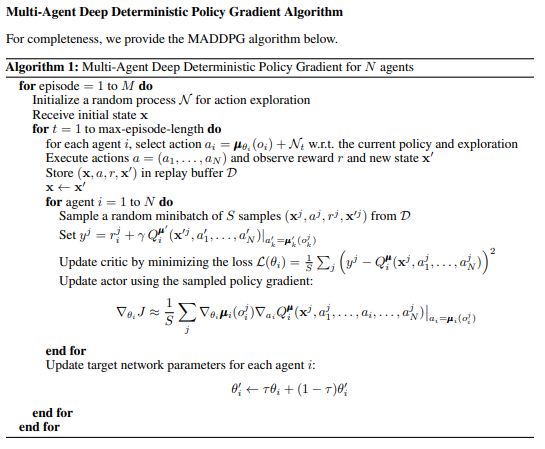

Image source: Lowe et al., 2017

## Algorithm hyperparameters

MADDPG standar parameters
* GAMMA = 0.99                    (discount factor)
* TAU = 5e-2                      (for soft update of target parameters)
* LR_ACTOR = 5e-4                 (learning rate of the actor) 
* LR_CRITIC = 5e-4                (learning rate of the critic)
* WEIGHT_DECAY = 0.0              (L2 weight decay)
* NOISE_AMPLIFICATION = 1         (exploration noise amplification)
* NOISE_AMPLIFICATION_DECAY = 1   (noise amplification decay)

Distributional Learning hyperparameters
* Vmax = 10
* Vmin = -10
* N_ATOMS = 51
* DELTA_Z = (Vmax - Vmin) / (N_ATOMS - 1)

## Networks arquitectures

The multi agent ddpg algorthm uses a "n" Critic and Actor networks in wich the critic concatenates the partial states plus actions of every agent as input:

- **Actor**:
The actor network consist of three fully conecteds layers with relu activation functions in the hidden layers and tanh in the output layer.


Name | shape | input
------------ | ------------- | -------------
fc1 | (24, 64) | input
fc2 | (64, 64) | fc1
fc3 | (64, 2) | fc2
    
- **Critic**:
The critic network consist also of three fully conecteds layers to predict the particles of the categorical distribution.


Name | shape | input
------------ | ------------- | -------------
fc1 | (24 * number_of_agents, 400) | input
fc2 | (400 + 2*number_of_agents, 300) | fc1
fc3 | (300, 51) | fc2






## Plot of Rewards


![Rewards](./media/rewards.png)

The agent was able to achive a reward of +0.5 after 2883 episodes. 

## Ideas for Future Work

I'd like to implement the n-steps part of the d4pg to my implementation.